<a href="https://colab.research.google.com/github/DrBharathiTC/Medical-insurance-premium-prediction/blob/main/MEDICAL_INSURANCE_PREMIUM_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MEDICAL INSURANCE PREMIUM PRICE PREDICTION**

## **LIBRARIES USED**

In [ ]:
# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## **MOUNTING DRIVE**

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# using pandas library and 'read_csv' function to read YesBank_StockPrices csv file
PPDF=pd.read_csv("/content/drive/My Drive/Medical Insurance Premium Prediction/Medicalpremium.csv")

## **Data Exploration**

In [ ]:
#number of rows and columns 
PPDF.shape

(986, 11)

This Dataset has 986 observations in it with 11 columns(features)

In [ ]:
PPDF.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [ ]:
# Here showing in Dataset the First Five rows by using head() method 
PPDF.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
# Here showing in Dataset the Last Five rows by using tail() method
PPDF.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


In [ ]:
#information of the dataset 
PPDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
#description of the data in the dataset
PPDF.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
#Looking for missing values
PPDF.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

No missing values in dataset. Here our dataset in no nan values

In [ ]:
#Looking for duplicates in dataset
len(PPDF[PPDF.duplicated()])

0

Do not have any duplicates in dataset

Correct data format We are almost there! The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In [ ]:
PPDF.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

## **Checking the Outlier**

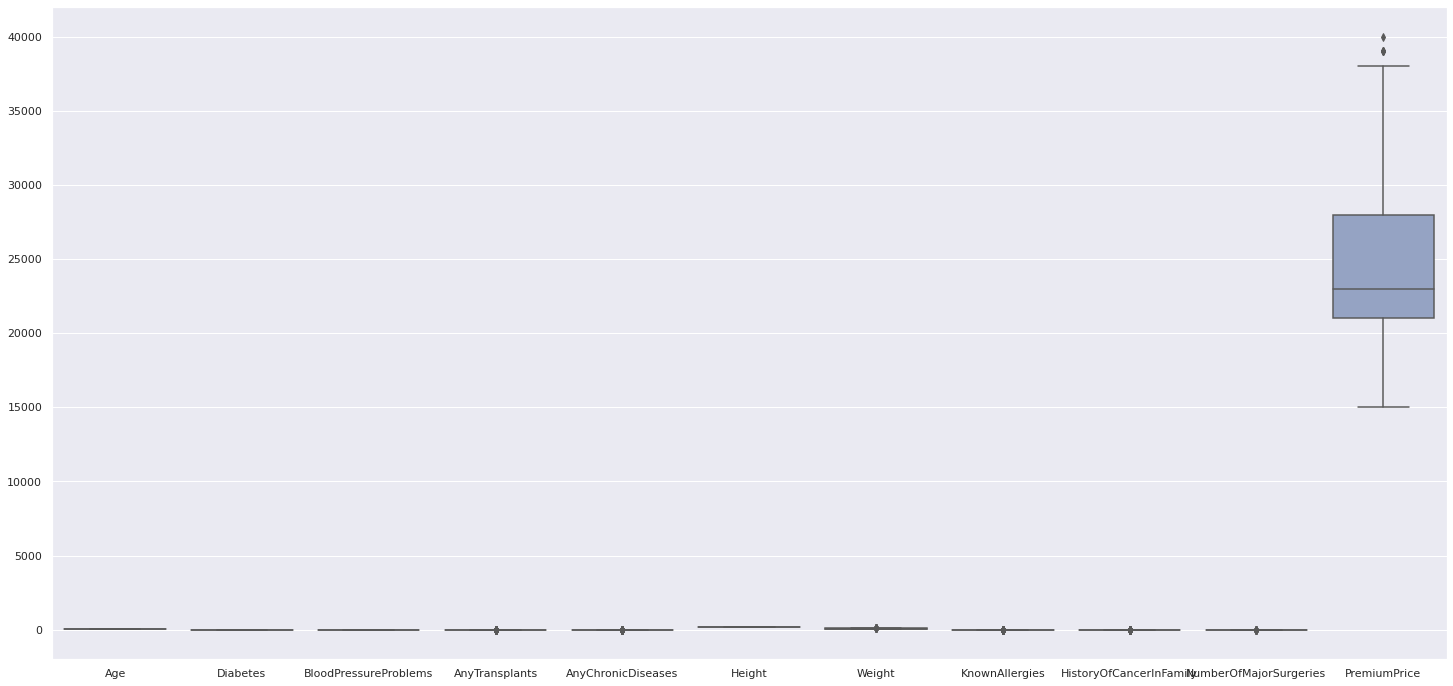

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(25,12)})
ax = sns.boxplot(data=PPDF, orient="v", palette="Set2")

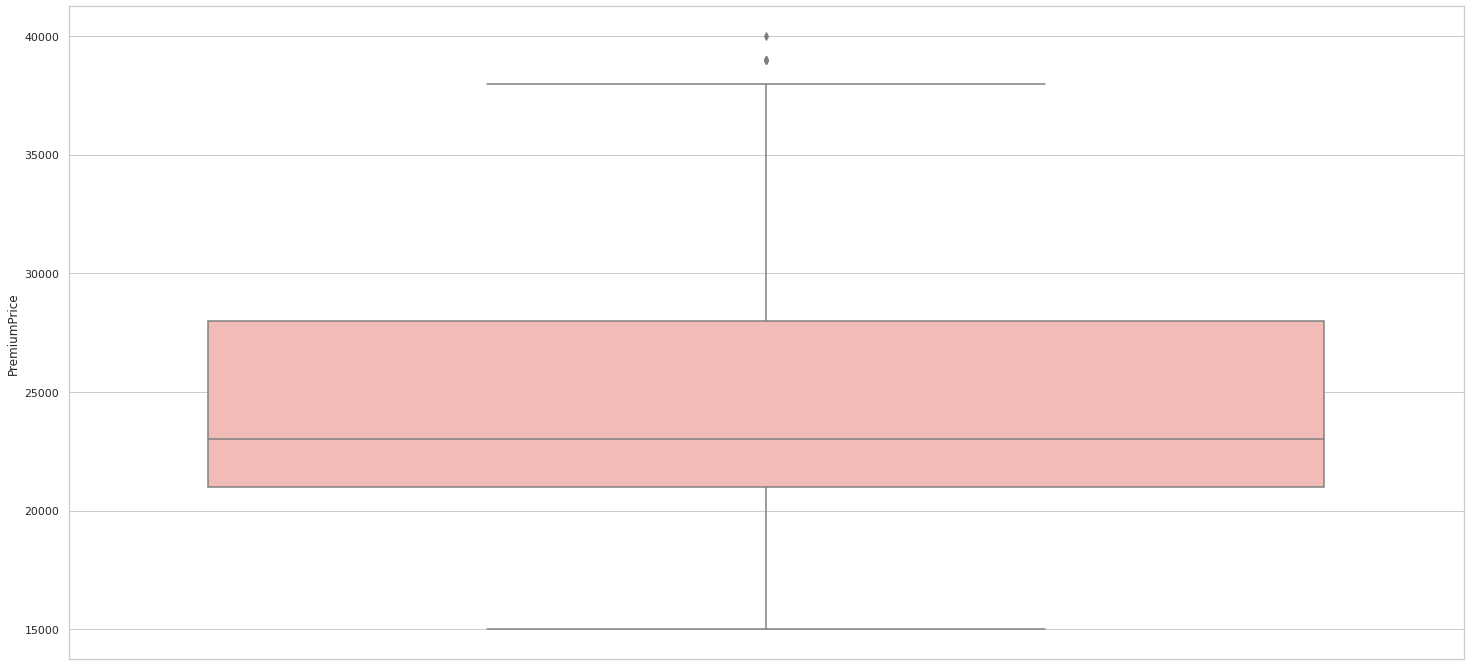

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(y=PPDF[('PremiumPrice')], palette='Pastel1');
plt.show()

### **Removing outliers**

In [ ]:
percentile_25 = np.percentile(PPDF['PremiumPrice'],25)
percentile_75 = np.percentile(PPDF['PremiumPrice'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr
PPDF.drop(index=PPDF[PPDF['PremiumPrice']>upper_outlier_bound].index,axis=0,inplace=True)
PPDF.drop(index=PPDF[PPDF['PremiumPrice']<lower_outlier_bound].index,axis=0,inplace=True)

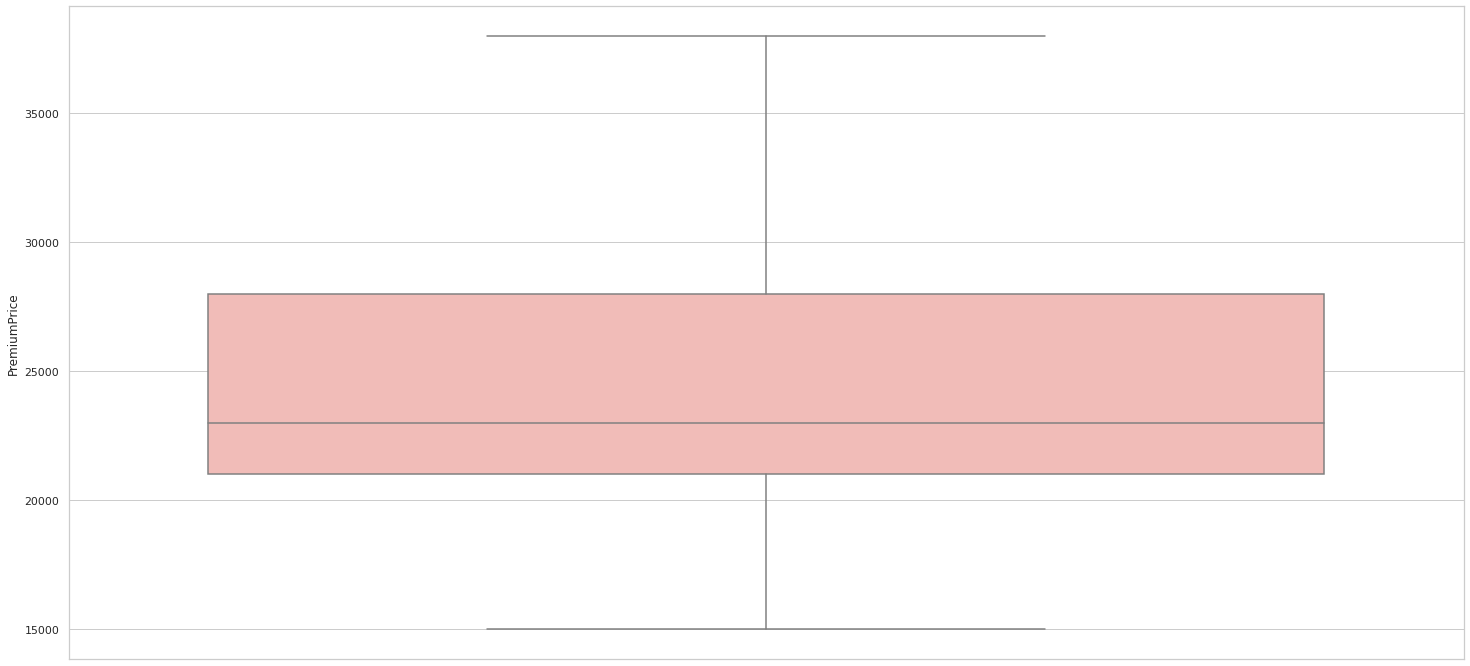

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(y=PPDF[('PremiumPrice')], palette='Pastel1');
plt.show()

Data Wrangling is finished. Dataset is clean and ready for exploratory data analysis

(Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

Objectives: Handle missing values Correct data format Standardize and normalize data)

In [ ]:
PPDF.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


# **Visualising the data**

## **Univariate analysis**

Dependent variable - premium price of insurance

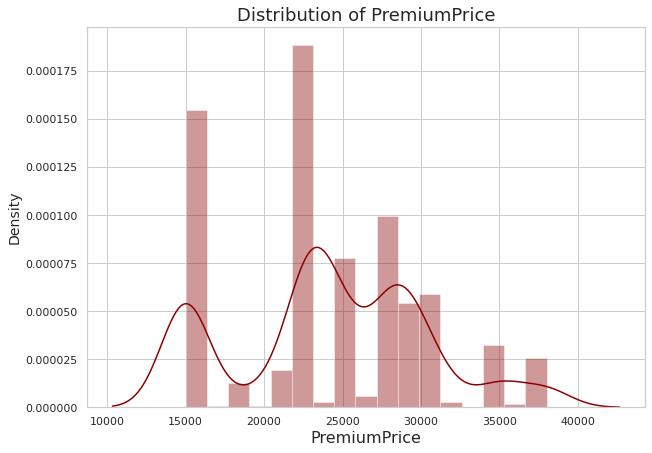

In [ ]:
# depndent variable is 'PremiumPrice'
plt.figure(figsize = (10,7))
sns.distplot(PPDF['PremiumPrice'], color = 'darkred',kde=True)
plt.title('Distribution of PremiumPrice', fontsize=18)
plt.xlabel('PremiumPrice', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

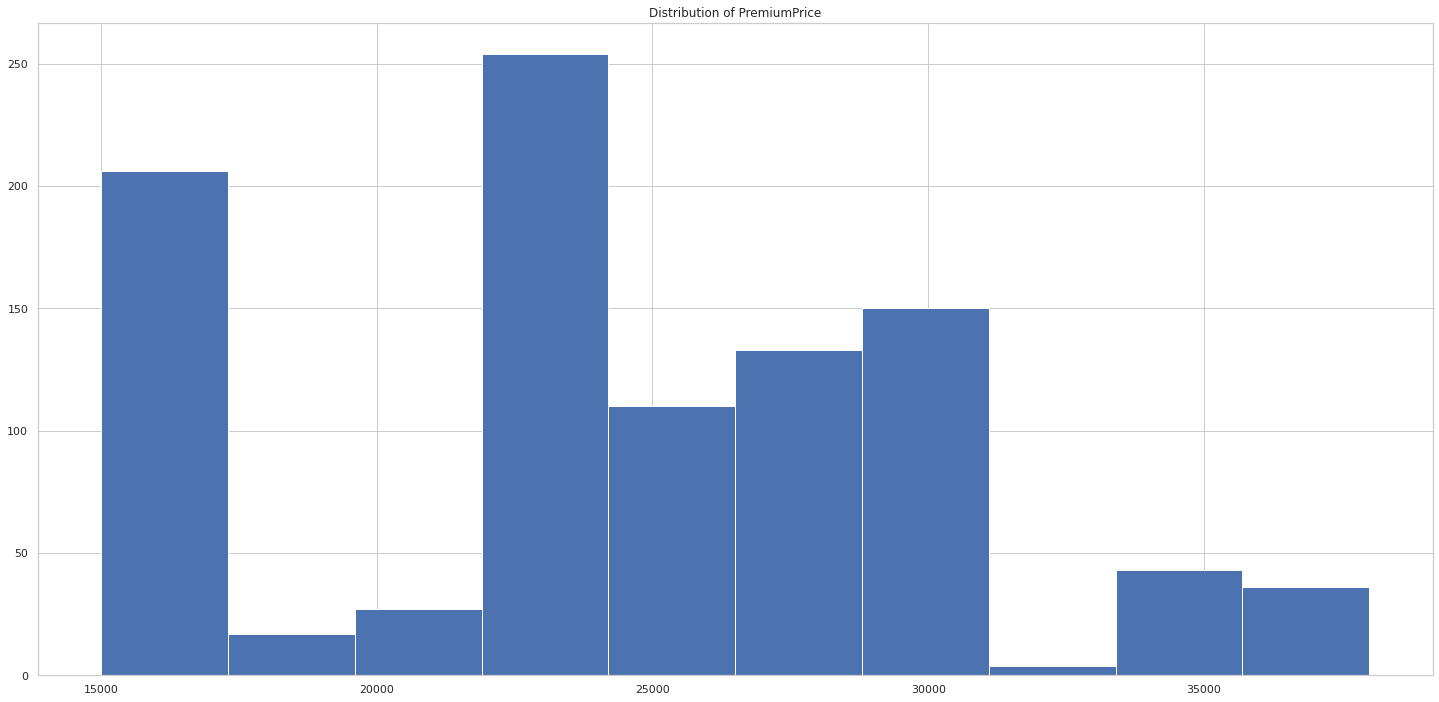

In [ ]:
PPDF.PremiumPrice.hist()
plt.title('Distribution of PremiumPrice');

### **Checking the distribution of variables using KDE plot**

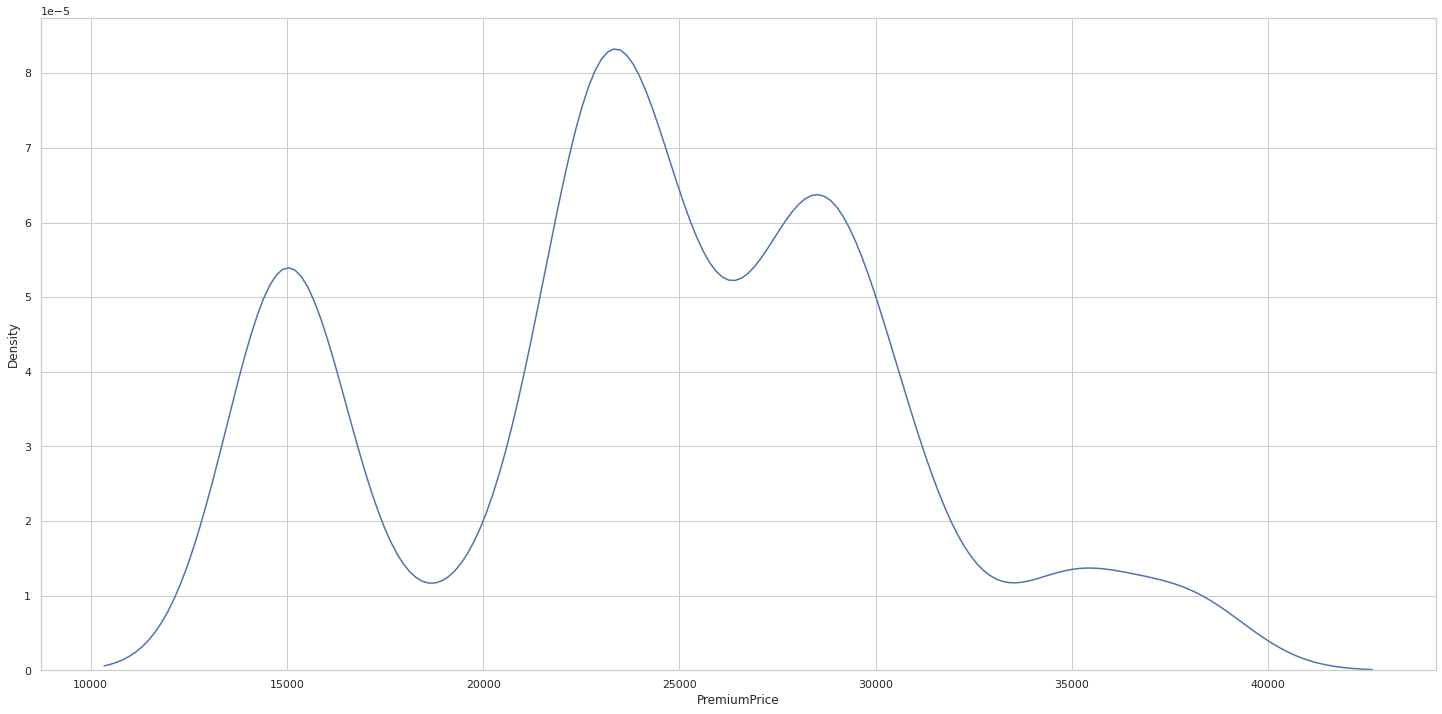

In [ ]:
sns.kdeplot(PPDF.PremiumPrice);

### **Checking the distribution of variables using a Q-Q plot**

In [ ]:
#importing necessary libraries
import scipy.stats as stats
import pylab

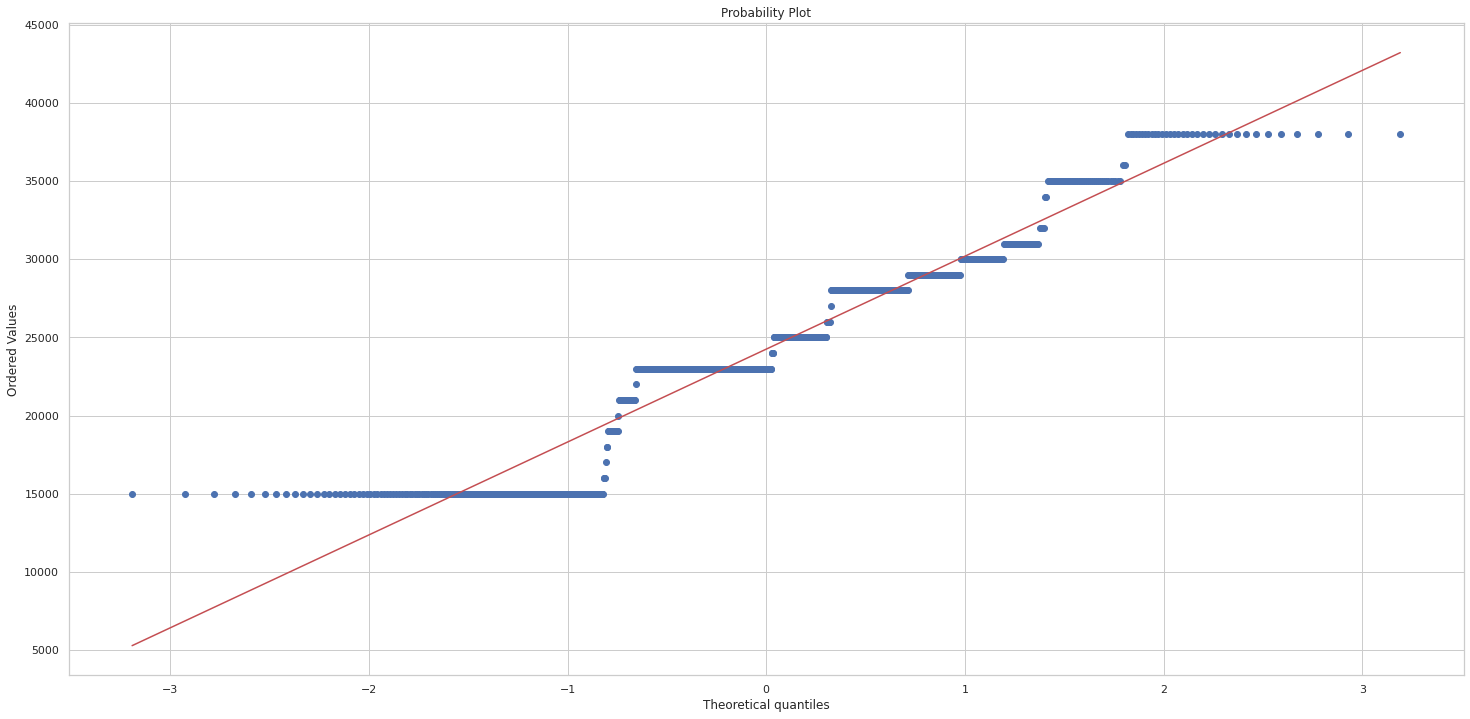

In [ ]:
stats.probplot(PPDF.PremiumPrice,plot=pylab);

## **Independent Variables Age , Height and Weight**
Plotting distribution of Age , Height and Weight

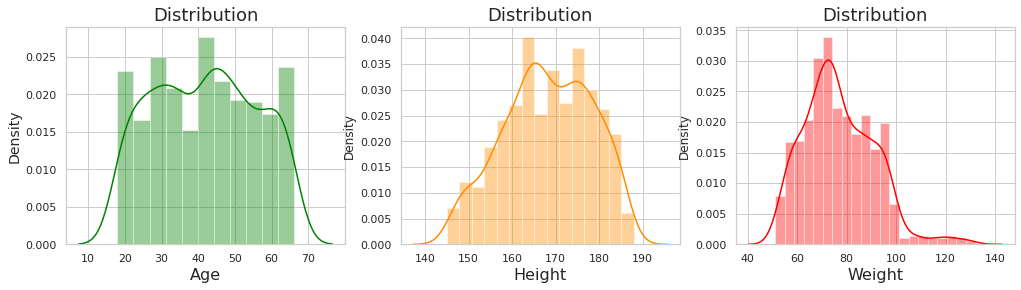

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(PPDF['Age'], color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Age', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(PPDF['Height'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('Height', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(PPDF['Weight'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Weight', fontsize= 16)

plt.show()


### **Categorical data visualisation**

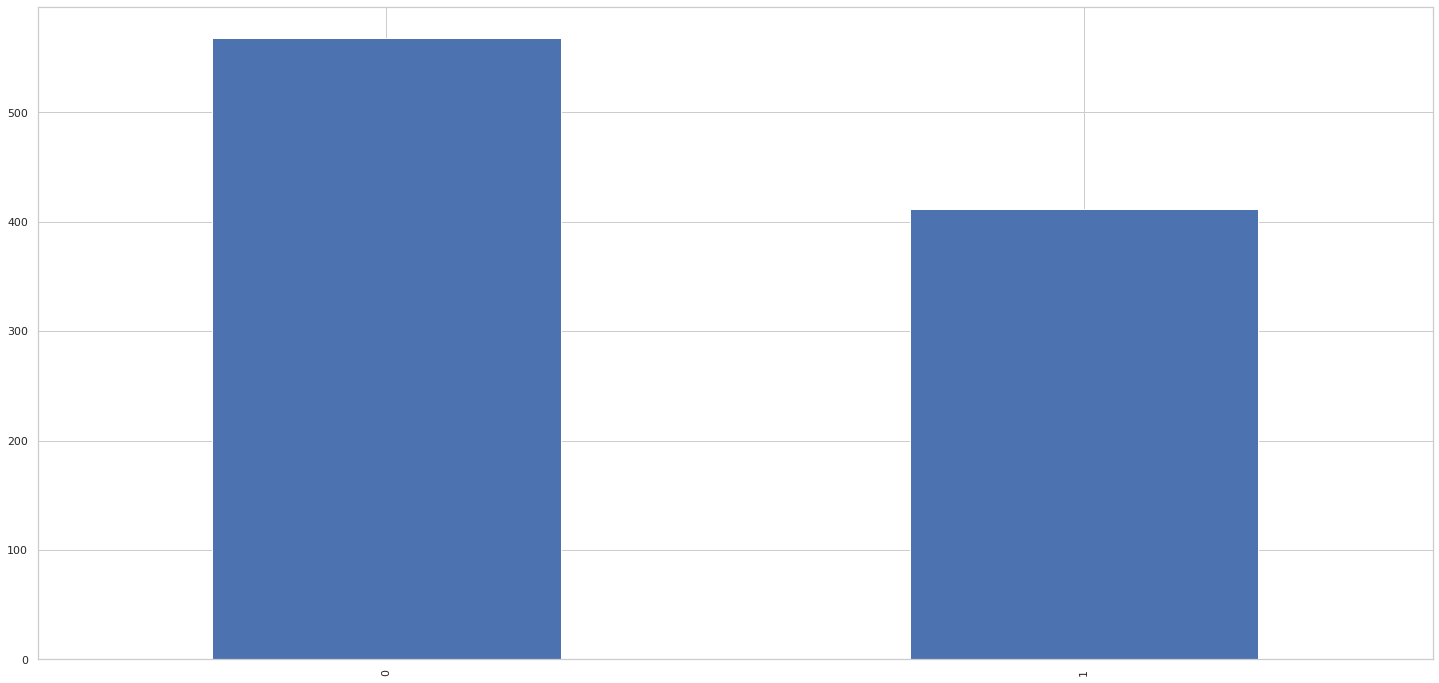

In [ ]:
PPDF['Diabetes'].value_counts().plot(kind='bar')

Count plot with data labels 

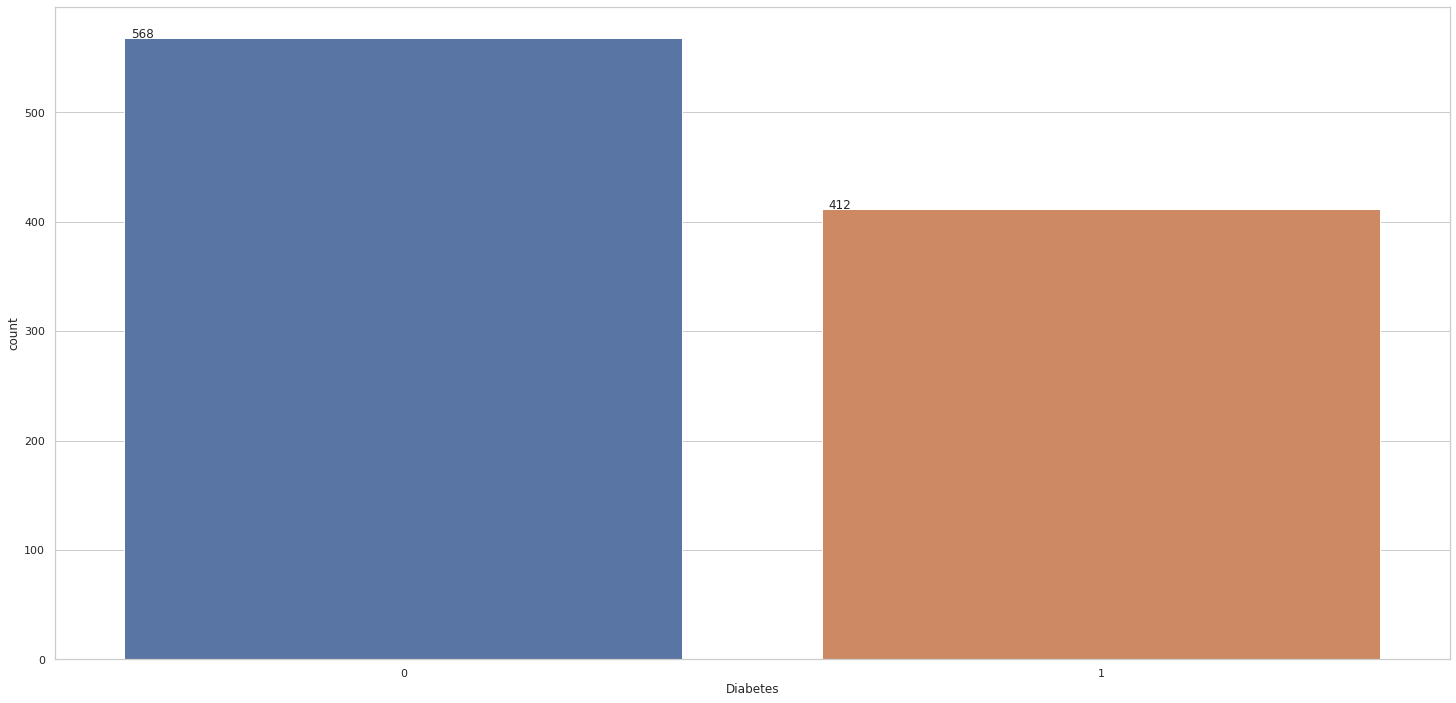

In [ ]:
ax = sns.countplot(x="Diabetes", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


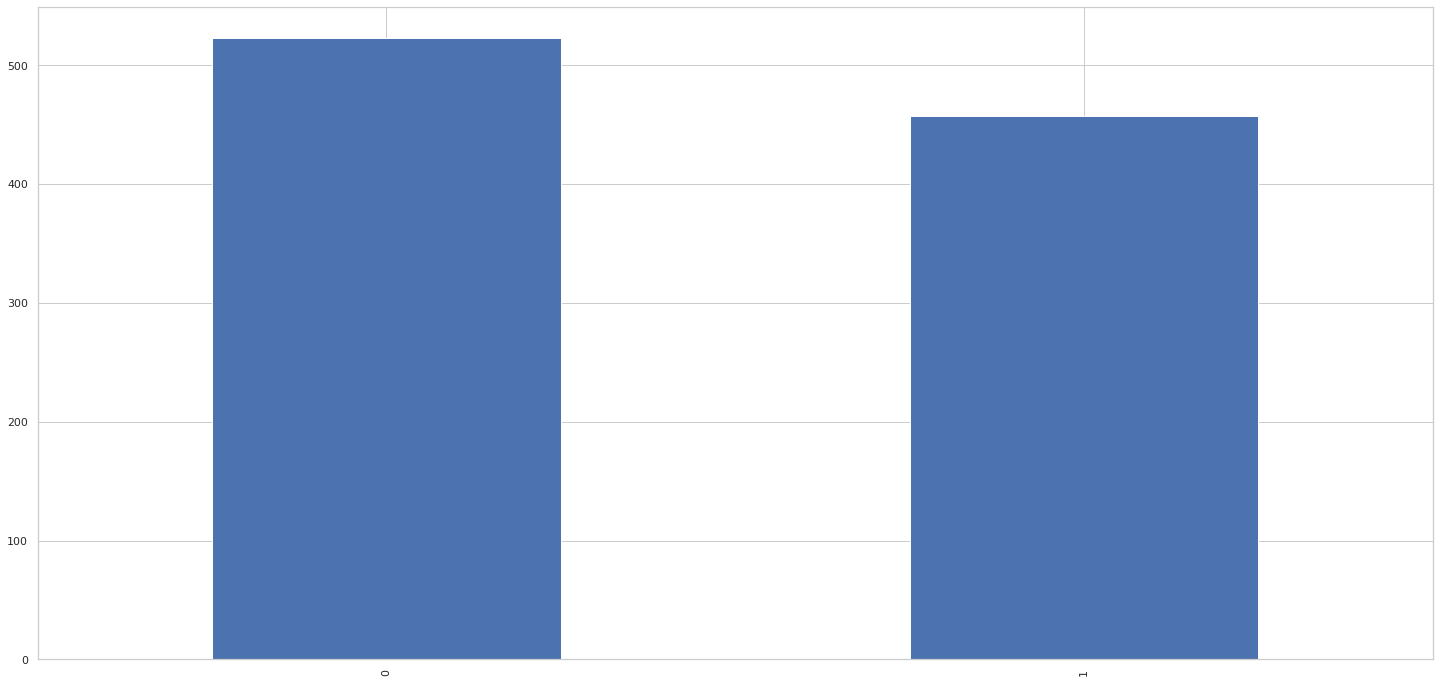

In [ ]:
PPDF['BloodPressureProblems'].value_counts().plot(kind='bar')

Count plot with data labels

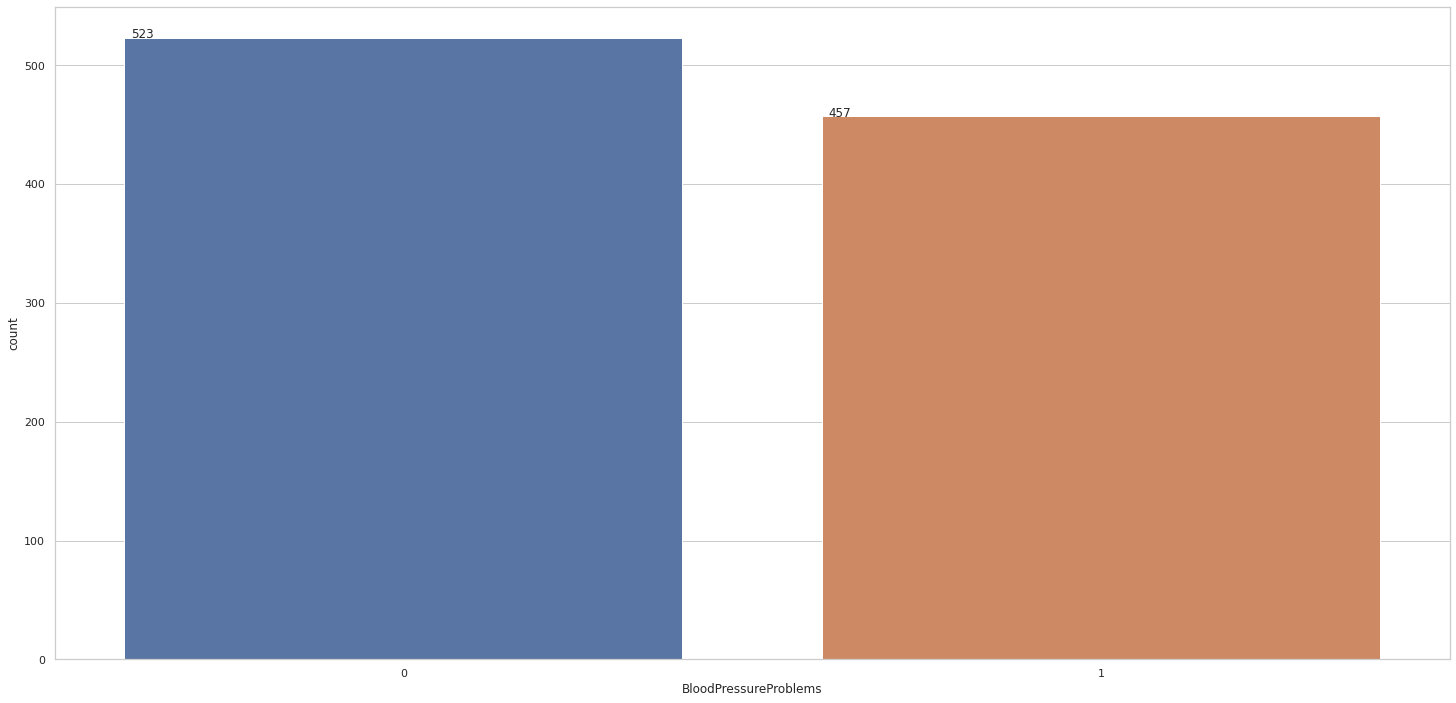

In [ ]:
ax = sns.countplot(x="BloodPressureProblems", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


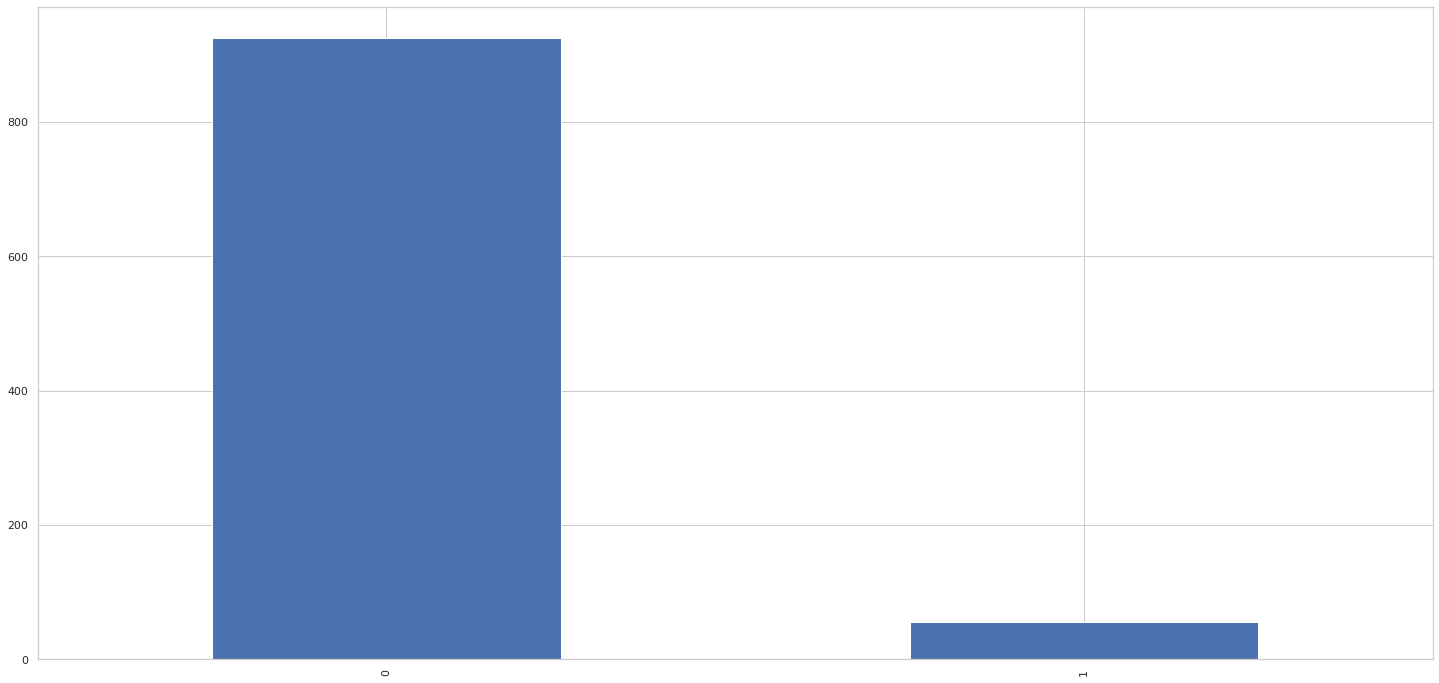

In [ ]:
PPDF['AnyTransplants'].value_counts().plot(kind='bar')

Count plot with data labels

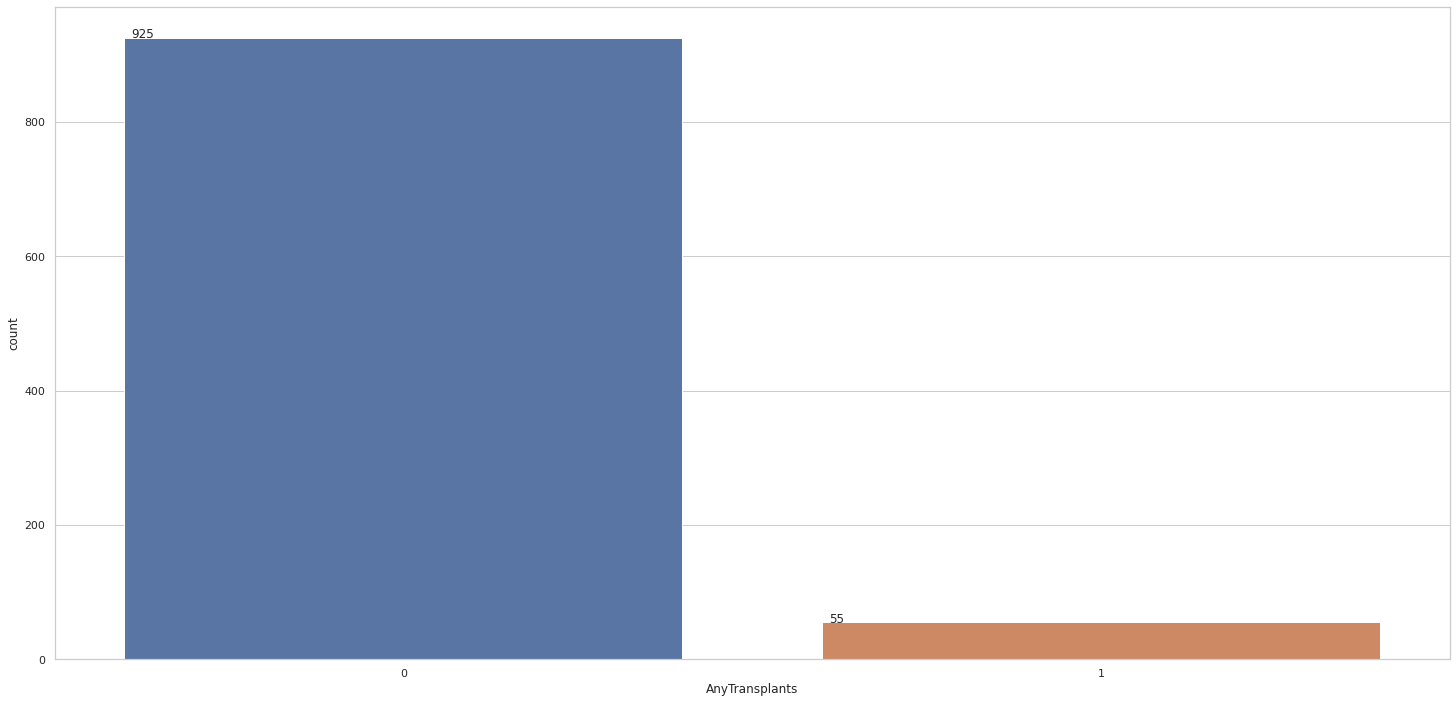

In [ ]:
ax = sns.countplot(x="AnyTransplants", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


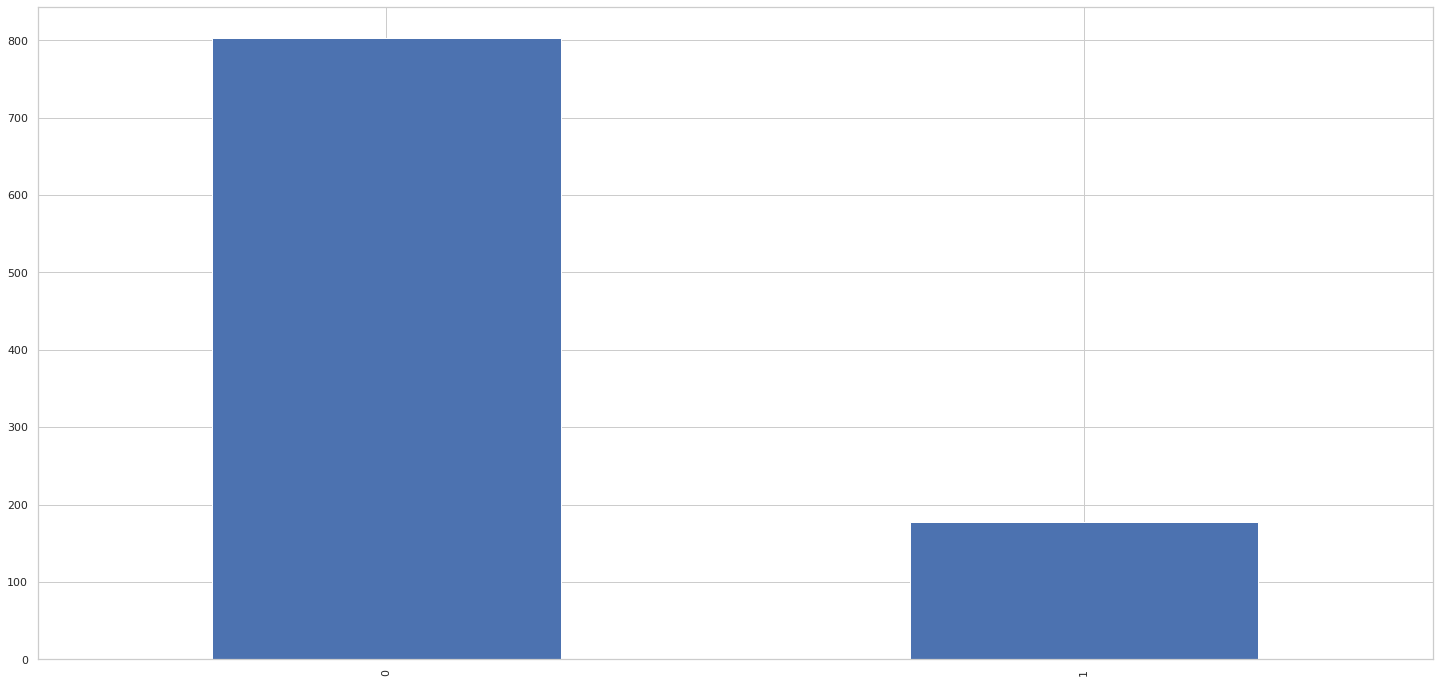

In [ ]:
PPDF['AnyChronicDiseases'].value_counts().plot(kind='bar')

Count plot with data labels

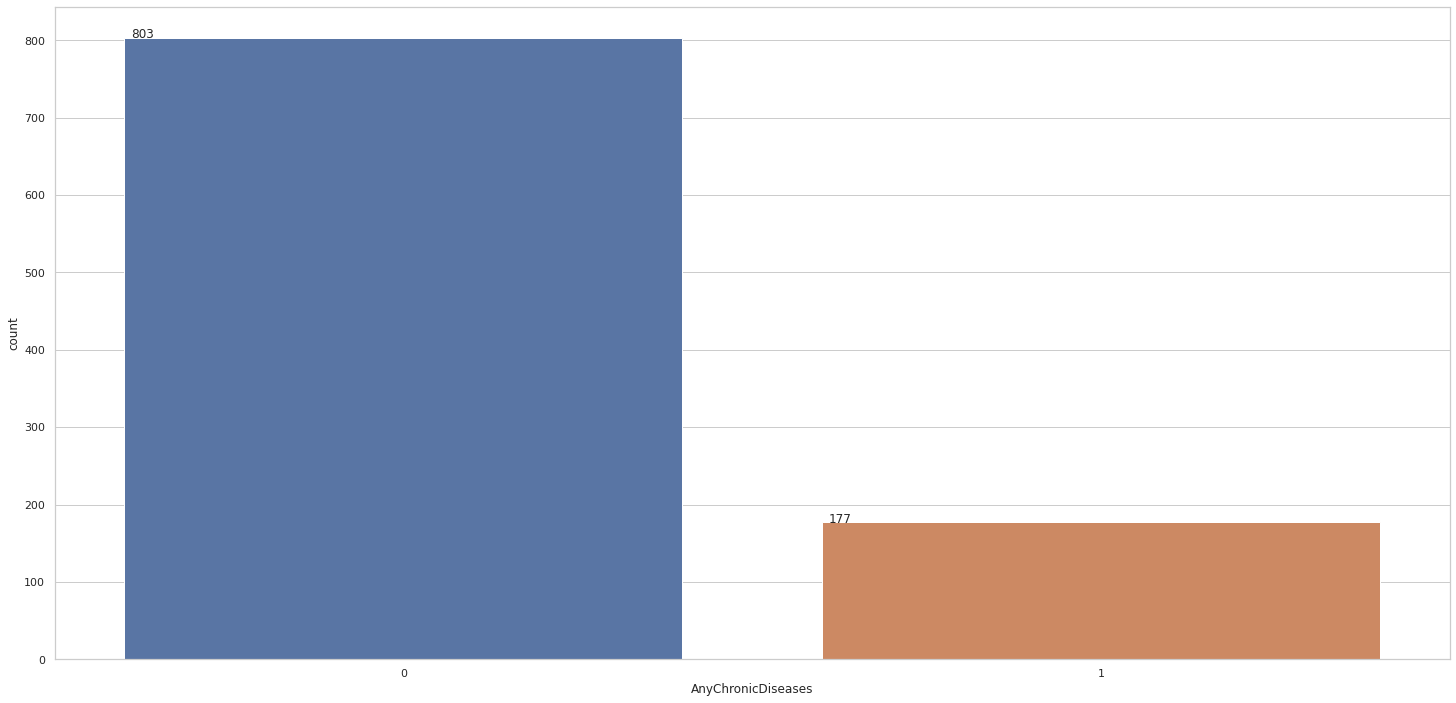

In [ ]:
ax = sns.countplot(x="AnyChronicDiseases", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

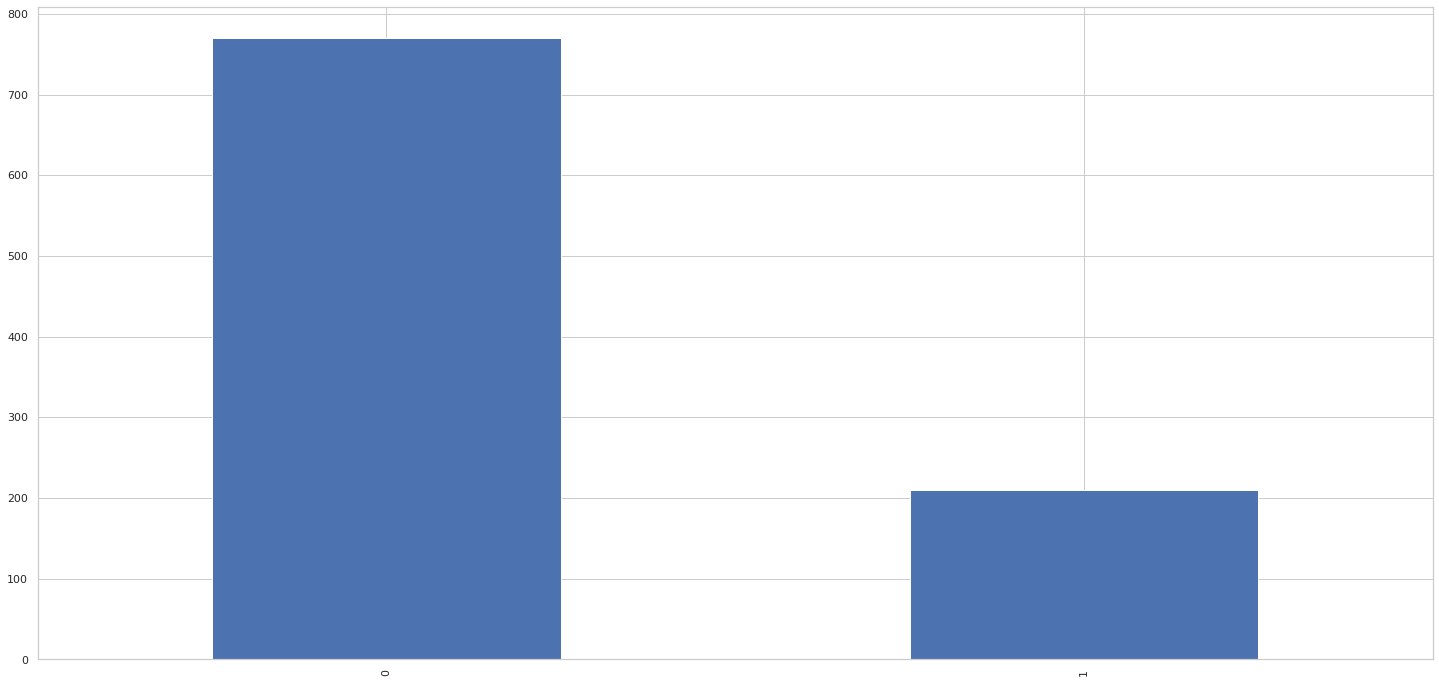

In [ ]:
PPDF['KnownAllergies'].value_counts().plot(kind='bar')

Count plot with data labels

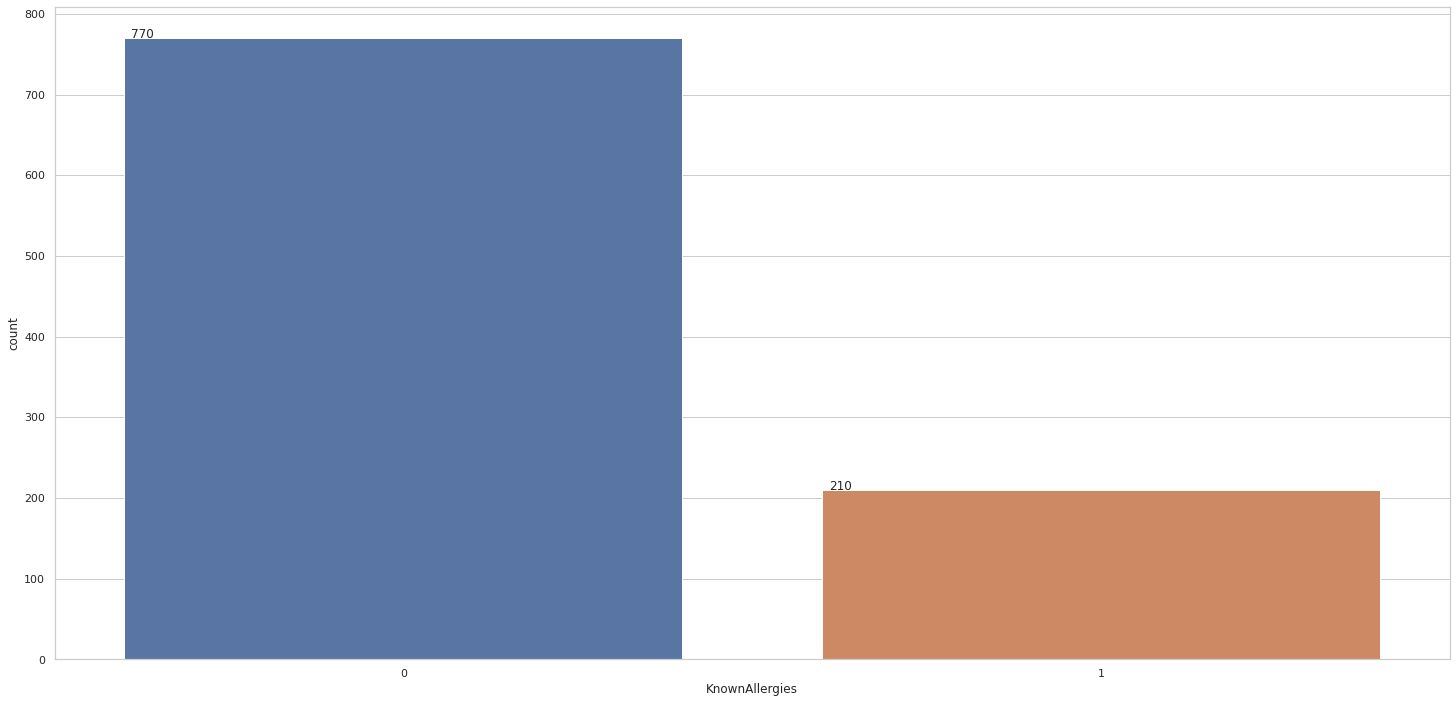

In [ ]:
ax = sns.countplot(x="KnownAllergies", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

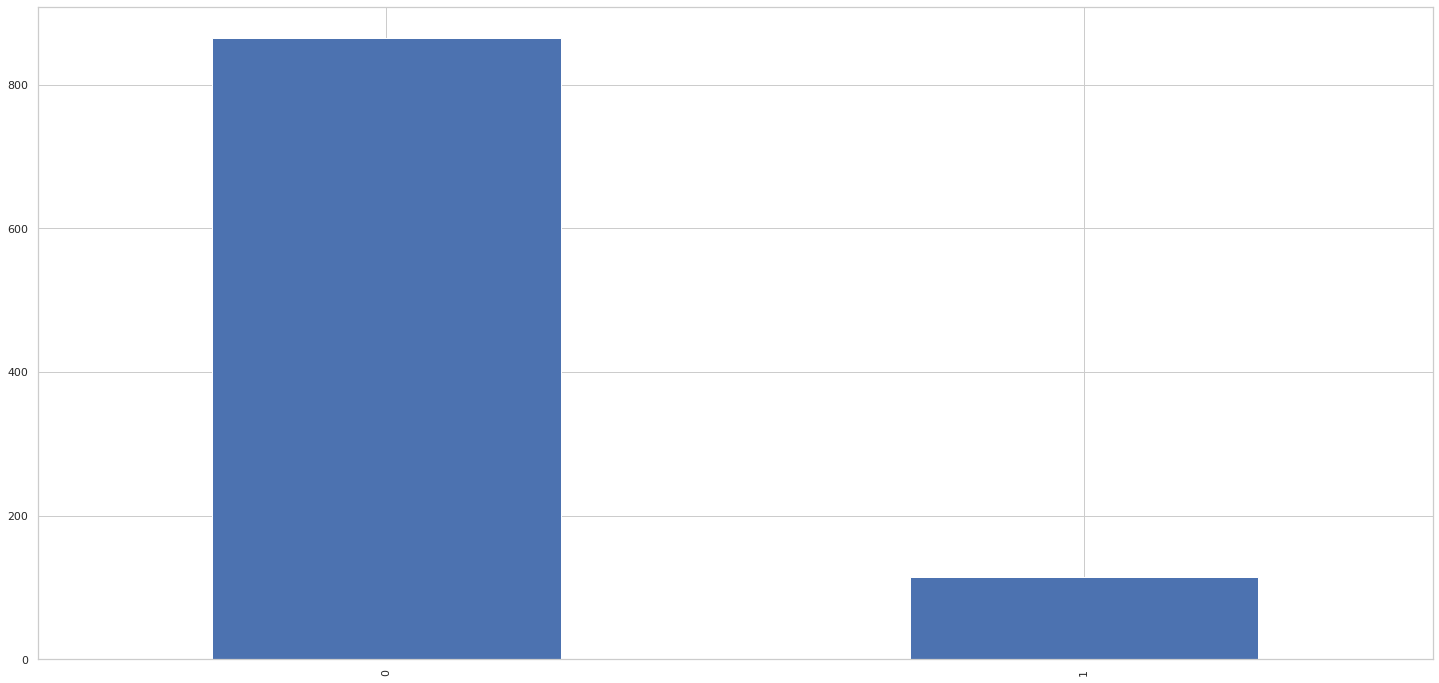

In [ ]:
PPDF['HistoryOfCancerInFamily'].value_counts().plot(kind='bar')

Count plot with data labels

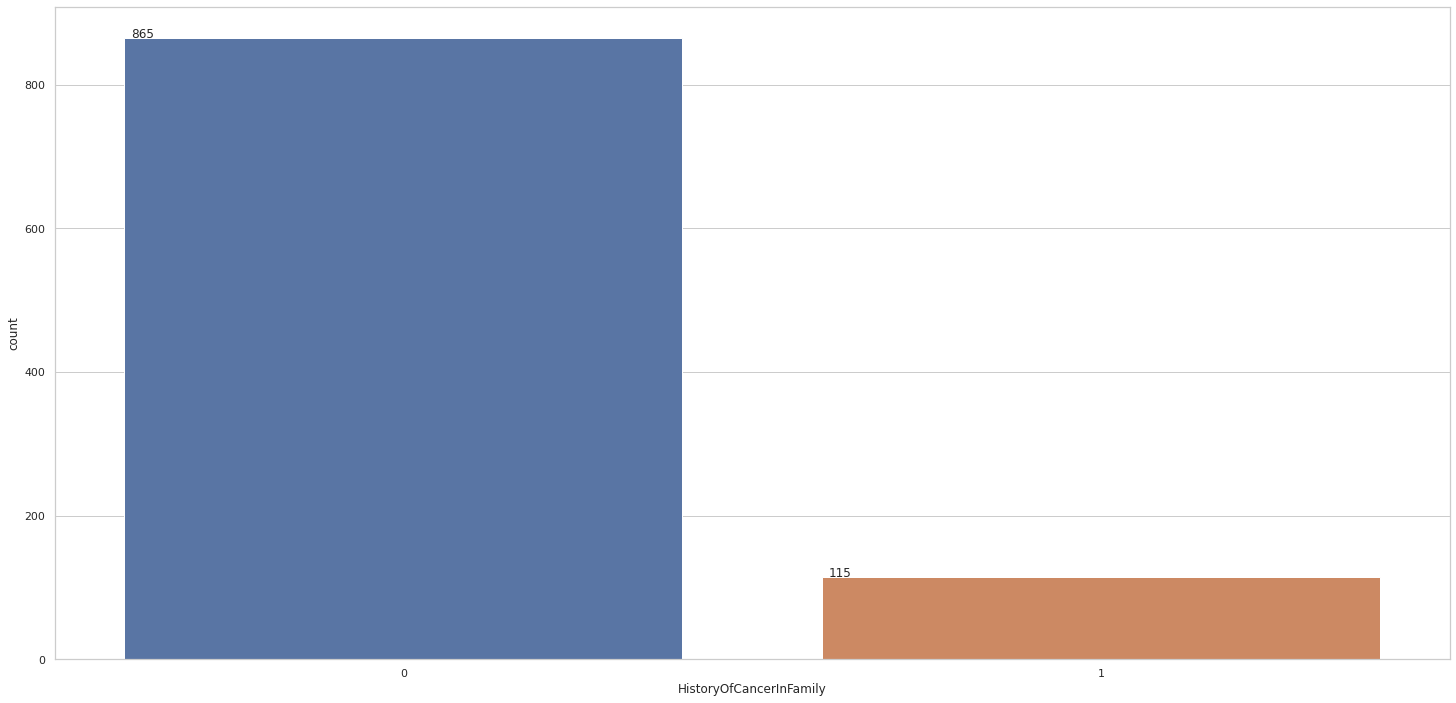

In [ ]:
ax = sns.countplot(x="HistoryOfCancerInFamily", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

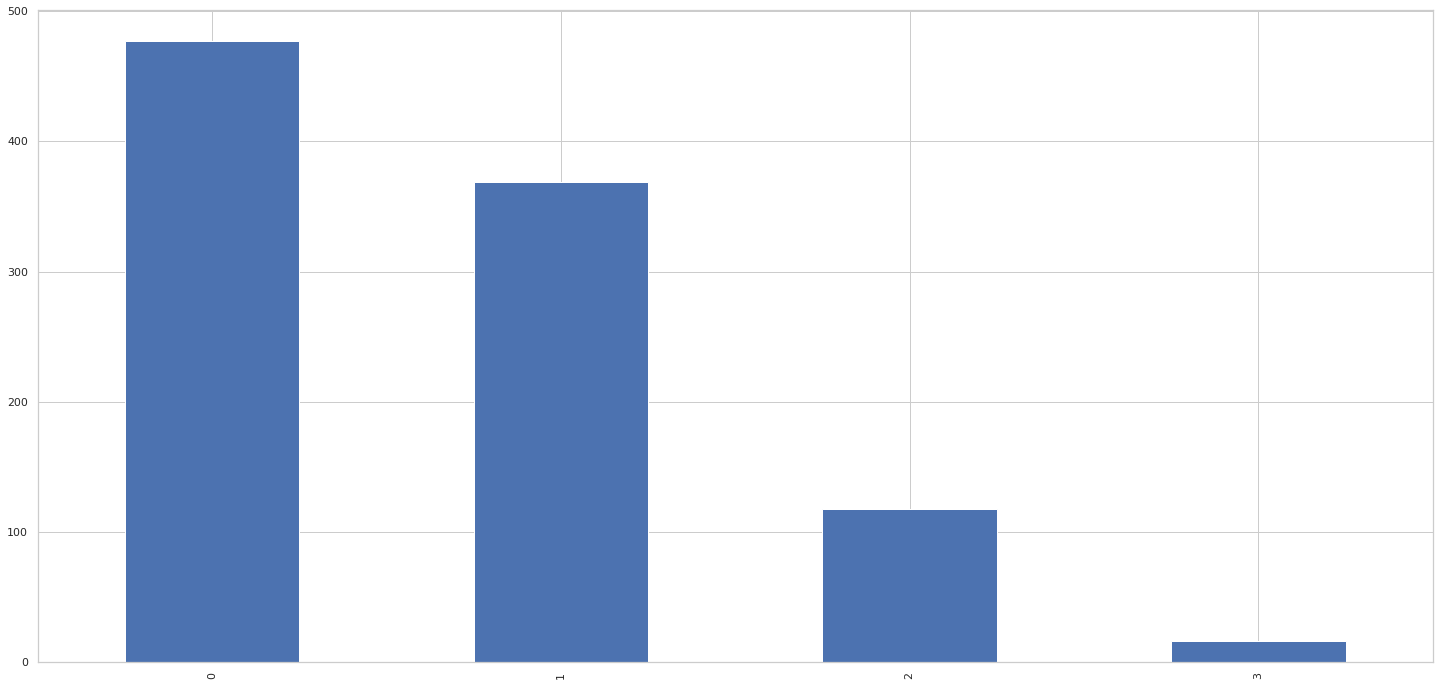

In [ ]:
PPDF['NumberOfMajorSurgeries'].value_counts().plot(kind='bar')

Count plot with data labels

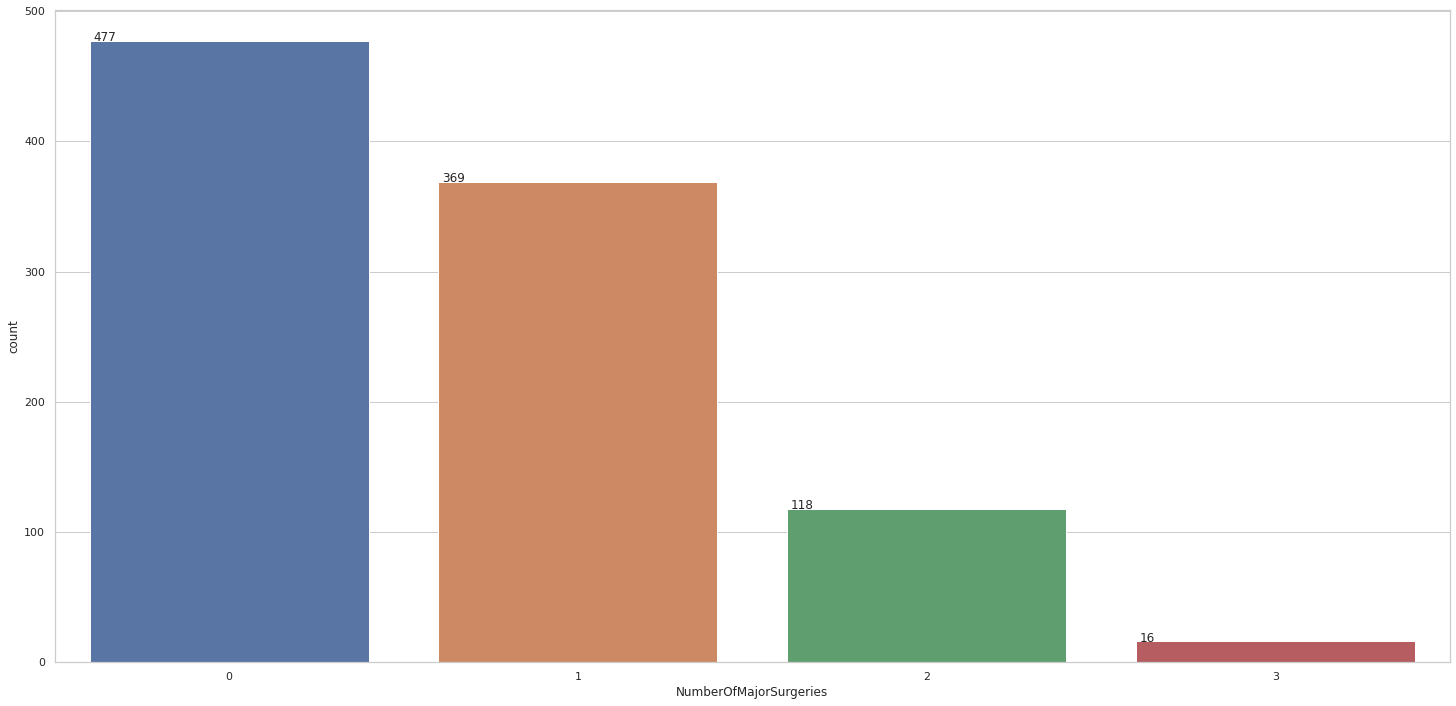

In [ ]:
ax = sns.countplot(x="NumberOfMajorSurgeries", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

## **Multivariate analysis**

PremiumPrice vs Other Variables

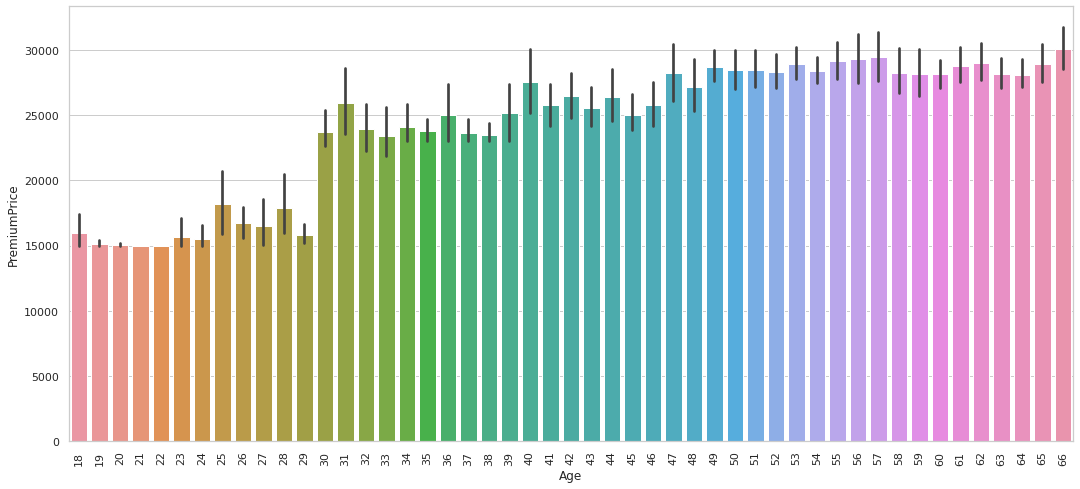

In [ ]:
# PremiumPrice vs Age
plt.figure(figsize = (18,8))
plt.xticks(rotation=90)
sns.barplot(x="Age", y="PremiumPrice", data=PPDF)
plt.show()

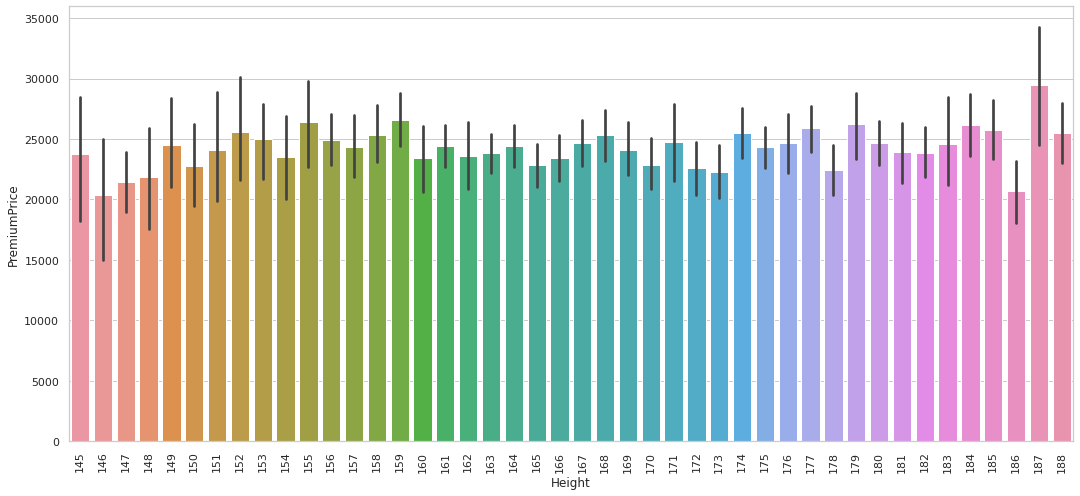

In [ ]:
# PremiumPrice vs Height
plt.figure(figsize = (18,8))
plt.xticks(rotation=90)
sns.barplot(x="Height", y="PremiumPrice", data=PPDF)
plt.show()

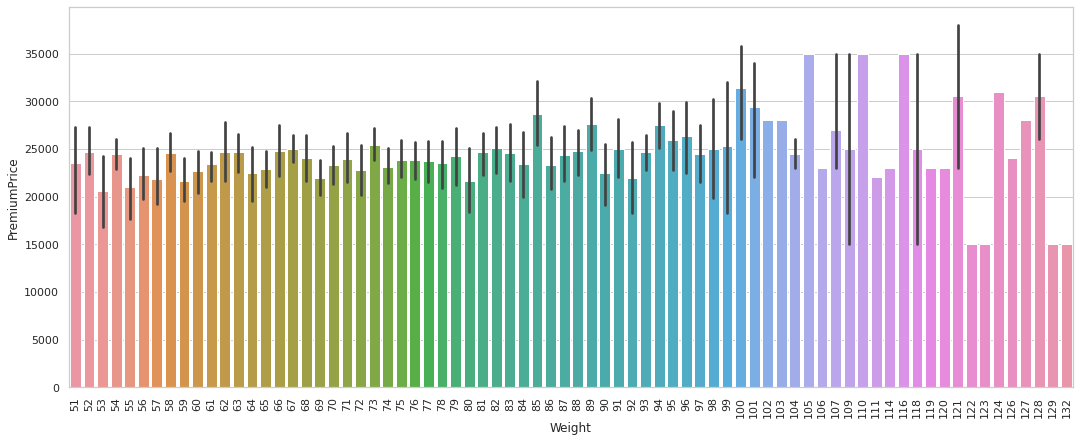

In [ ]:
# PremiumPrice vs Weight
plt.figure(figsize = (18,7))
plt.xticks(rotation=90)
sns.barplot(x="Weight", y="PremiumPrice", data=PPDF)
plt.show()

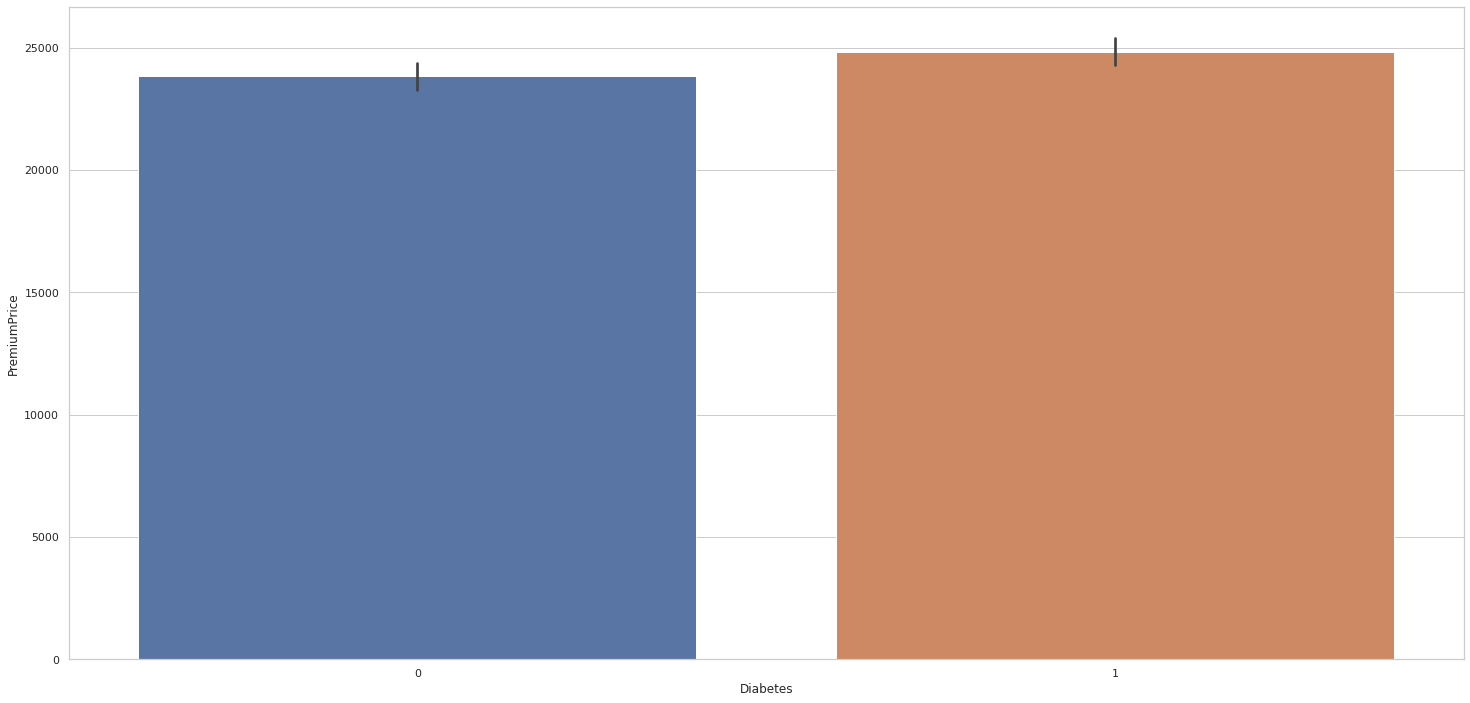

In [ ]:
sns.barplot(x="Diabetes", y="PremiumPrice", data=PPDF)
plt.show()

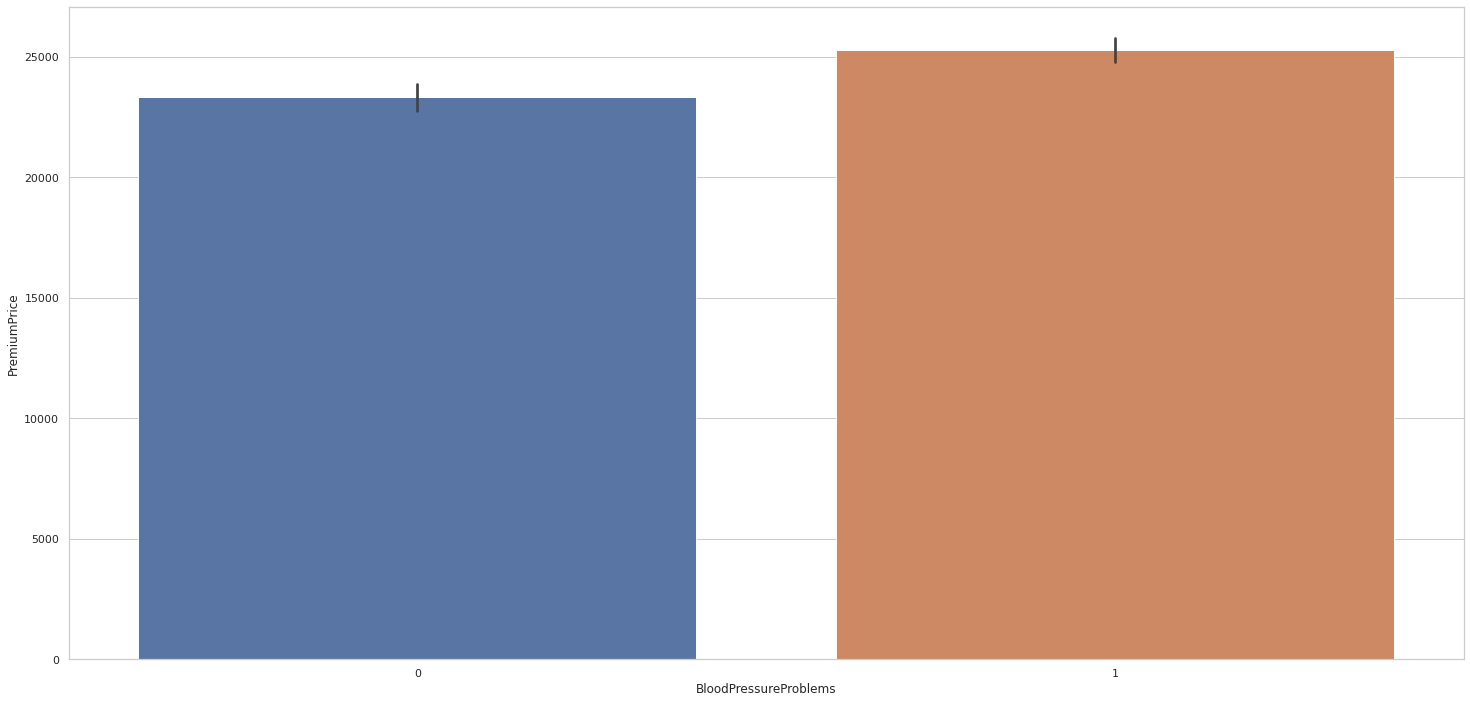

In [ ]:
sns.barplot(x="BloodPressureProblems", y="PremiumPrice", data=PPDF)
plt.show()

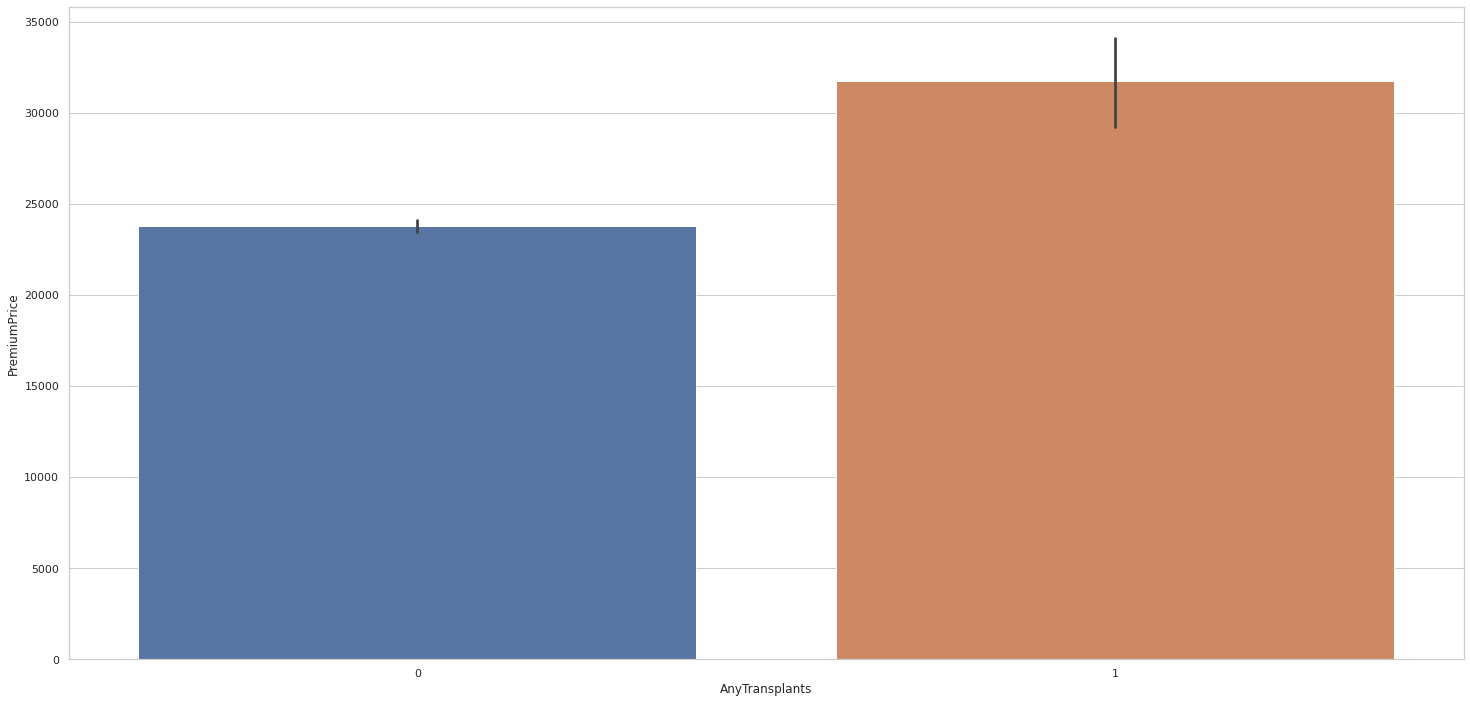

In [ ]:
sns.barplot(x="AnyTransplants", y="PremiumPrice", data=PPDF)
plt.show()

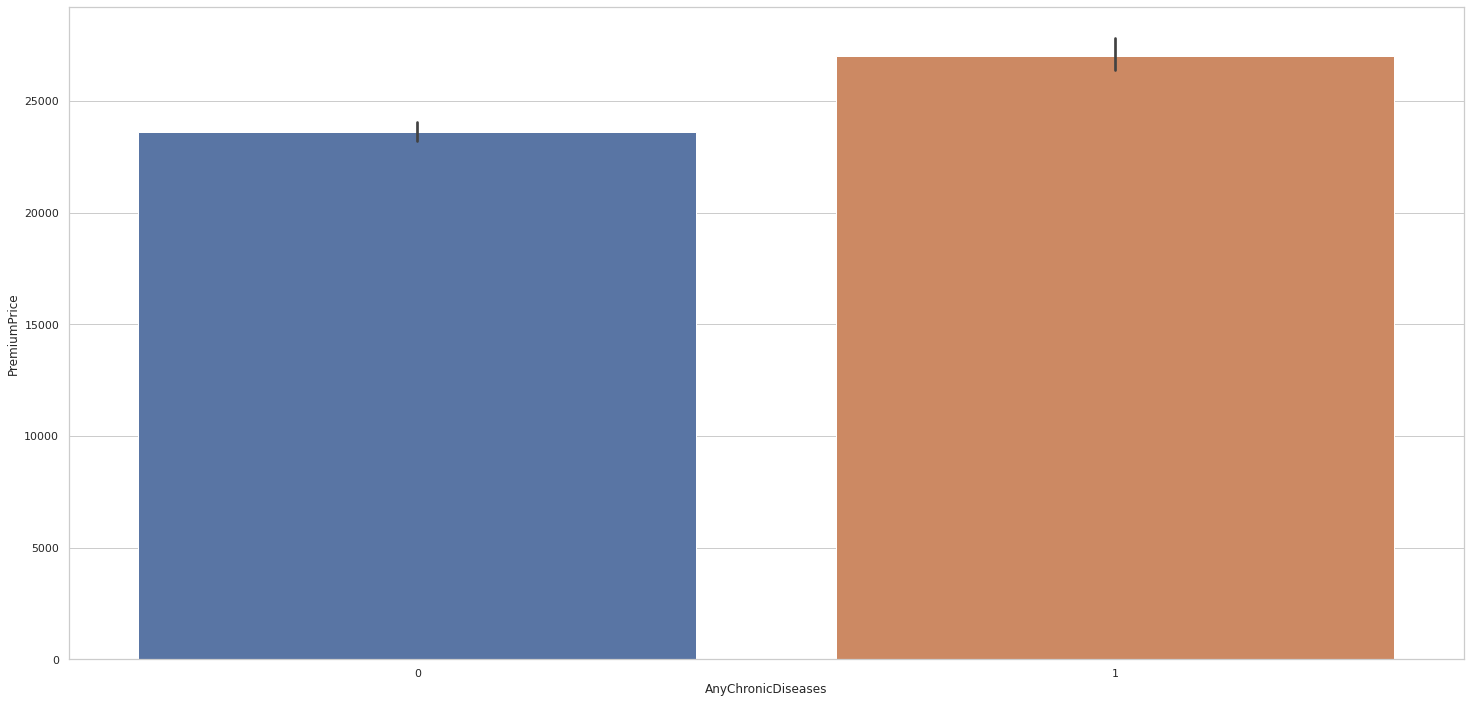

In [ ]:
sns.barplot(x="AnyChronicDiseases", y="PremiumPrice", data=PPDF)
plt.show()

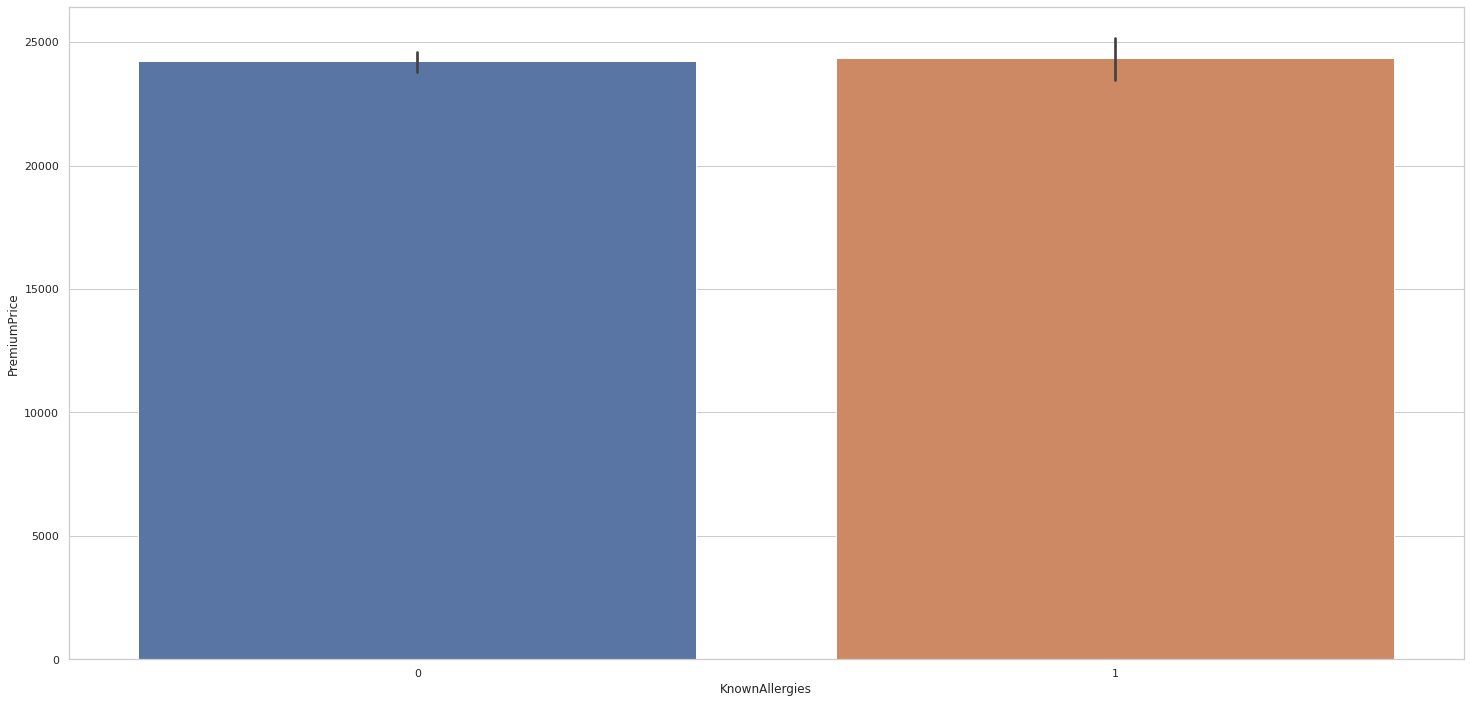

In [ ]:
sns.barplot(x="KnownAllergies", y="PremiumPrice", data=PPDF)
plt.show()

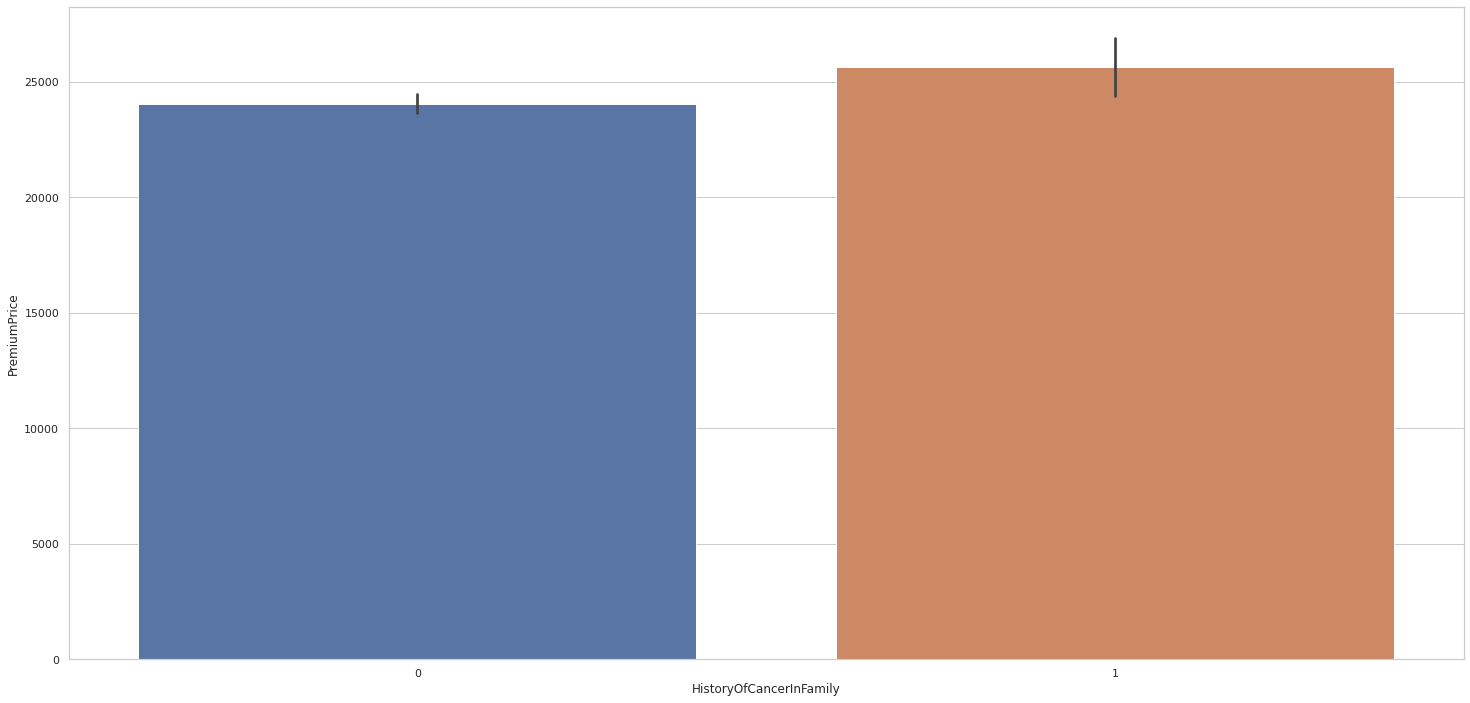

In [ ]:
sns.barplot(x="HistoryOfCancerInFamily", y="PremiumPrice", data=PPDF)
plt.show()

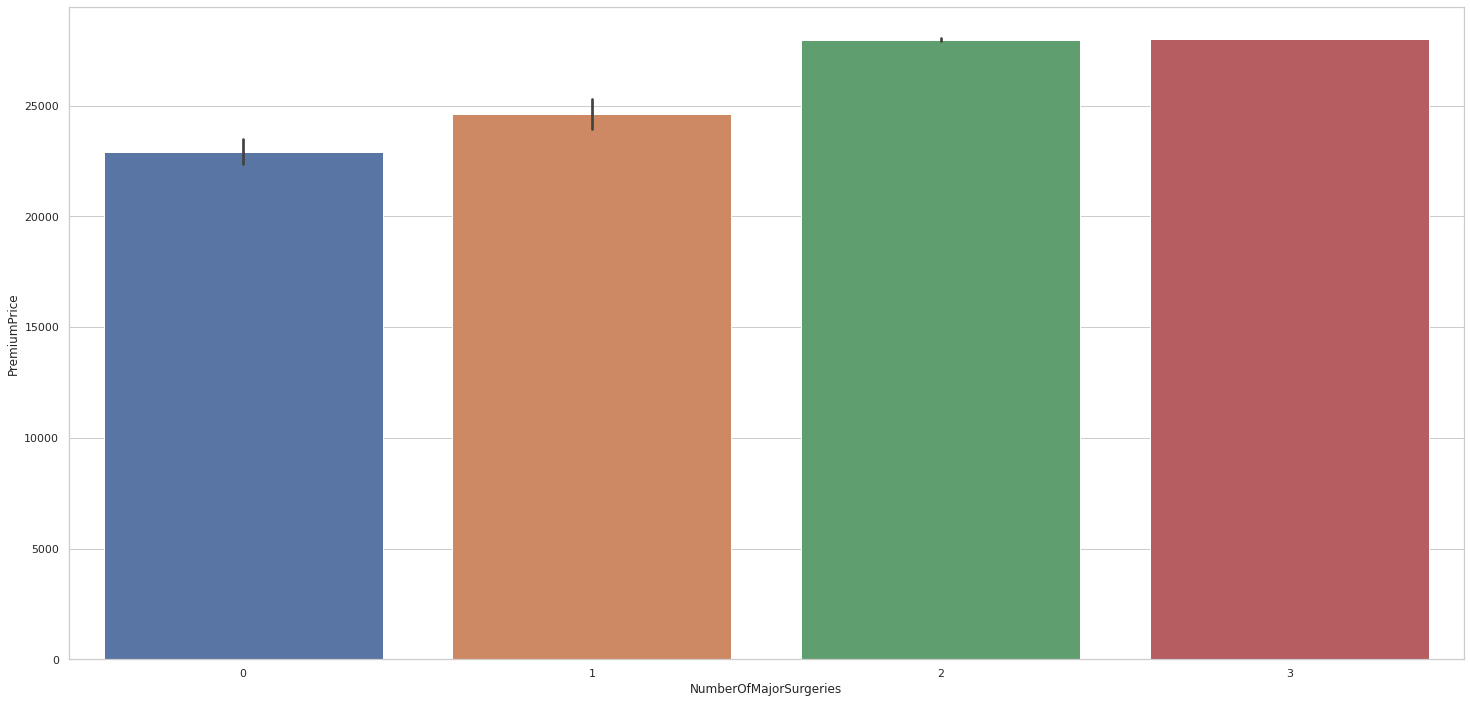

In [ ]:
sns.barplot(x="NumberOfMajorSurgeries", y="PremiumPrice", data=PPDF)
plt.show()

In [ ]:
PPDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      980 non-null    int64
 1   Diabetes                 980 non-null    int64
 2   BloodPressureProblems    980 non-null    int64
 3   AnyTransplants           980 non-null    int64
 4   AnyChronicDiseases       980 non-null    int64
 5   Height                   980 non-null    int64
 6   Weight                   980 non-null    int64
 7   KnownAllergies           980 non-null    int64
 8   HistoryOfCancerInFamily  980 non-null    int64
 9   NumberOfMajorSurgeries   980 non-null    int64
 10  PremiumPrice             980 non-null    int64
dtypes: int64(11)
memory usage: 124.2 KB


### **LOG TRANSFORMATION**

Creating a copy of original dataset

In [ ]:
PPDFC=PPDF.copy()

In [ ]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

In [ ]:
#performing logarithmic transformation on the feature
PPDFC['PremiumPrice_log']=np.log(PPDFC['PremiumPrice'])

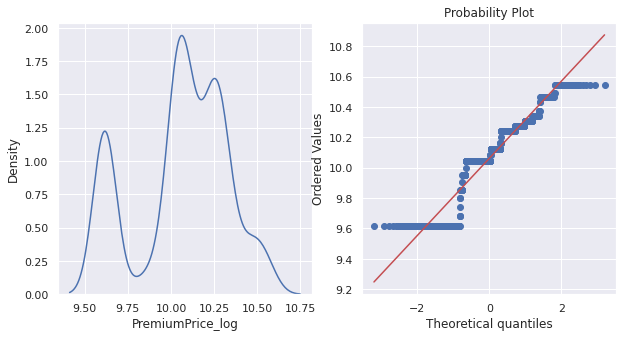

In [ ]:
#plotting to check the transformation
normality(PPDFC,'PremiumPrice_log')

### **Square Root Transformation** This transformation will take the square root of the Price column i.e sqrt(Price).

Creating a copy of original dataset

In [ ]:
PPDF2=PPDF.copy()

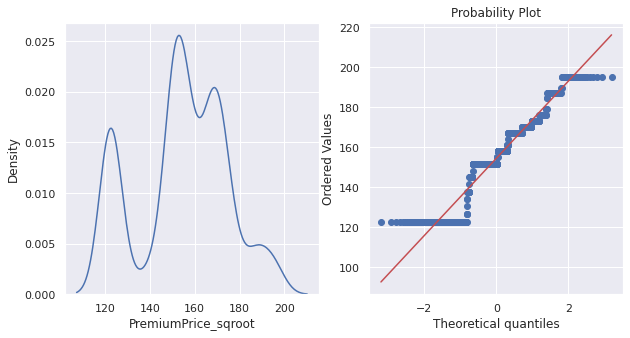

In [ ]:
PPDF2['PremiumPrice_sqroot']=np.sqrt(PPDF2.PremiumPrice)
normality(PPDF2,'PremiumPrice_sqroot')


### **Creating a copy of original dataset**

In [ ]:
PPDFR=PPDF.copy()

### **Reciprocal Transformation – This will inverse values of Price i.e1/Price**

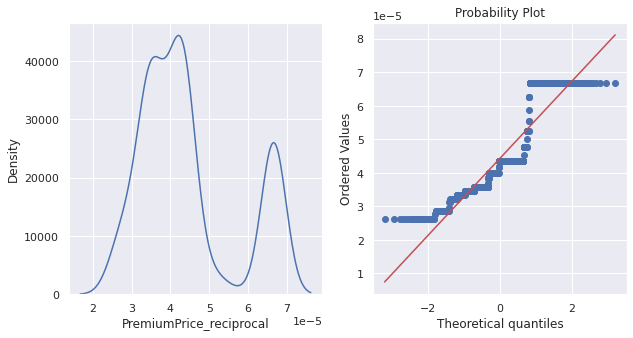

In [ ]:
PPDFR['PremiumPrice_reciprocal']=1/PPDFR.PremiumPrice
normality(PPDFR,'PremiumPrice_reciprocal')

### **Creating a copy of original dataset**

In [ ]:
PPDFE=PPDF.copy()

### **Exponential Transformation: The exponential value of the Price variable will be taken.**

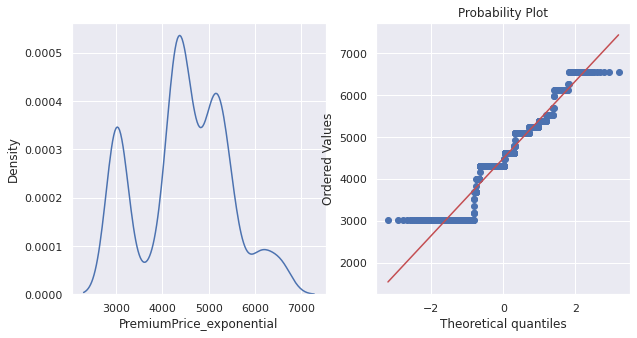

In [ ]:
PPDFE['PremiumPrice_exponential']=PPDFE.PremiumPrice**(1/1.2)
normality(PPDFE,'PremiumPrice_exponential')

### **Creating a copy of original dataset**

In [ ]:
PPDFB=PPDF.copy()

### **Box-Cox Transformation – The Box-Cox transformation is defined as:**


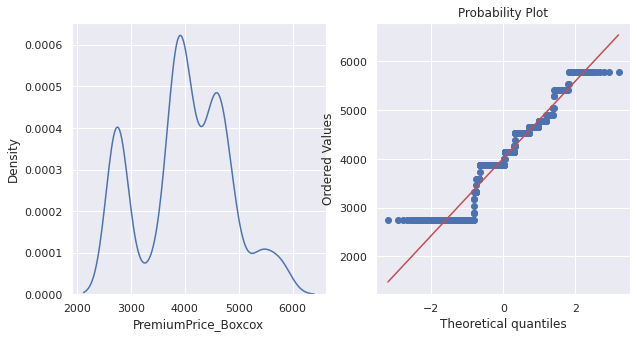

In [ ]:
PPDFB['PremiumPrice_Boxcox'],parameters=stats.boxcox(PPDFB['PremiumPrice'])
normality(PPDFB,'PremiumPrice_Boxcox')

From all the transformations discussed above, we can conclude that the Box cox and Exponential transformation are closer to normal distribution. Any one of the two can be used but as Box cox is more logic-based and involves the λ variable which is chosen as per the best skewness for the data so Box cox will be a better transformation to go with.

In [ ]:
  PPDFB.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumPrice_Boxcox
0,45,0,0,0,0,155,57,0,0,0,25000,4130.721390
1,60,1,0,0,0,180,73,0,0,0,29000,4651.810094
2,36,1,1,0,0,158,59,0,0,1,23000,3864.013993
3,52,1,1,0,1,183,93,0,0,2,28000,4522.964112
4,38,0,0,0,1,166,88,0,0,1,23000,3864.013993


### **BOXCOX TRANSFORMATION OF INDEPENDANT VARIABLES - AGE, HEIGHT AND WEIGHT**

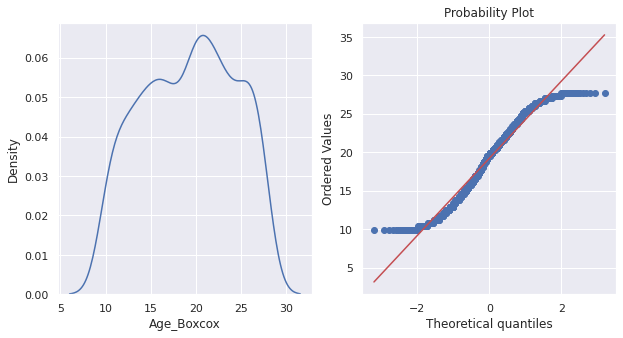

In [ ]:
PPDFB['Age_Boxcox'],parameters=stats.boxcox(PPDFB['Age'])
normality(PPDFB,'Age_Boxcox')

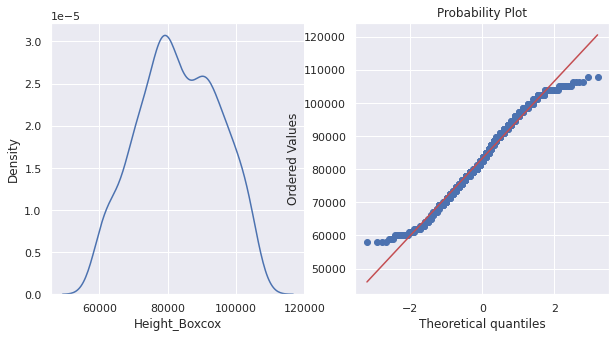

In [ ]:
PPDFB['Height_Boxcox'],parameters=stats.boxcox(PPDFB['Height'])
normality(PPDFB,'Height_Boxcox')

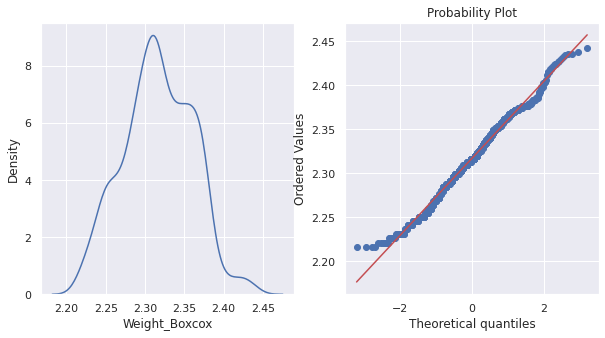

In [ ]:
PPDFB['Weight_Boxcox'],parameters=stats.boxcox(PPDFB['Weight'])
normality(PPDFB,'Weight_Boxcox')

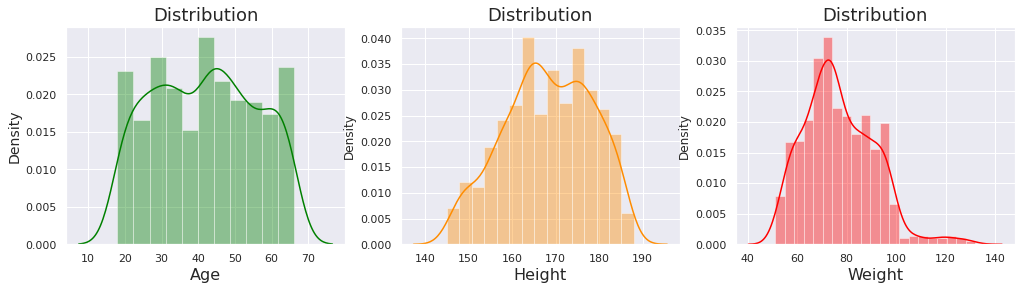

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(PPDF['Age'], color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Age', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(PPDF['Height'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('Height', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(PPDF['Weight'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Weight', fontsize= 16)

plt.show()


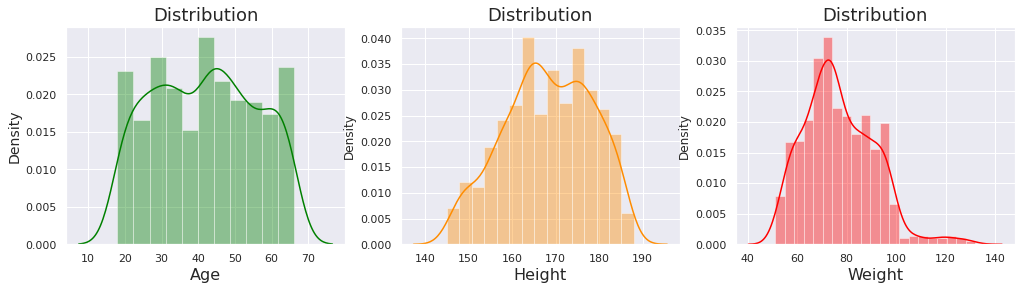

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(PPDFB['Age'], color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Age', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(PPDFB['Height'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('Height', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(PPDFB['Weight'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Weight', fontsize= 16)

plt.show()


# **Correlation**

Now, we will see the correlation between all the features in our data set

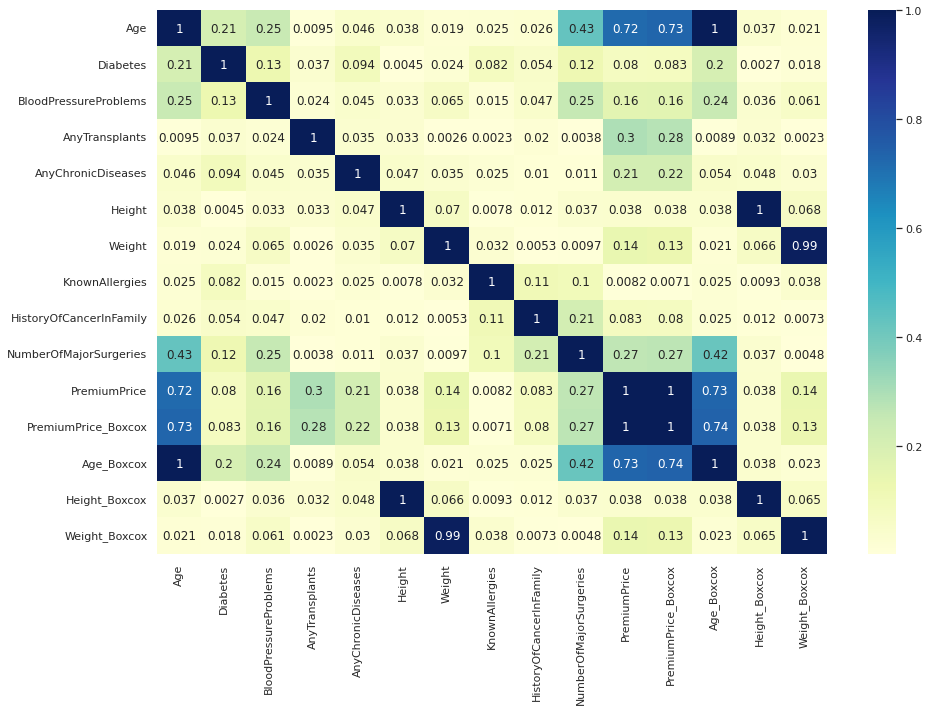

In [72]:
# let's find all feature's correlation with Heatmap
# correlation
plt.figure(figsize=(15,10))
correlation = PPDFB.corr()
sns.heatmap(abs(correlation), annot = True, cmap='YlGnBu')

In [74]:
FINDF=PPDFB.drop(['PremiumPrice','Age','Height','Weight'],axis=1)

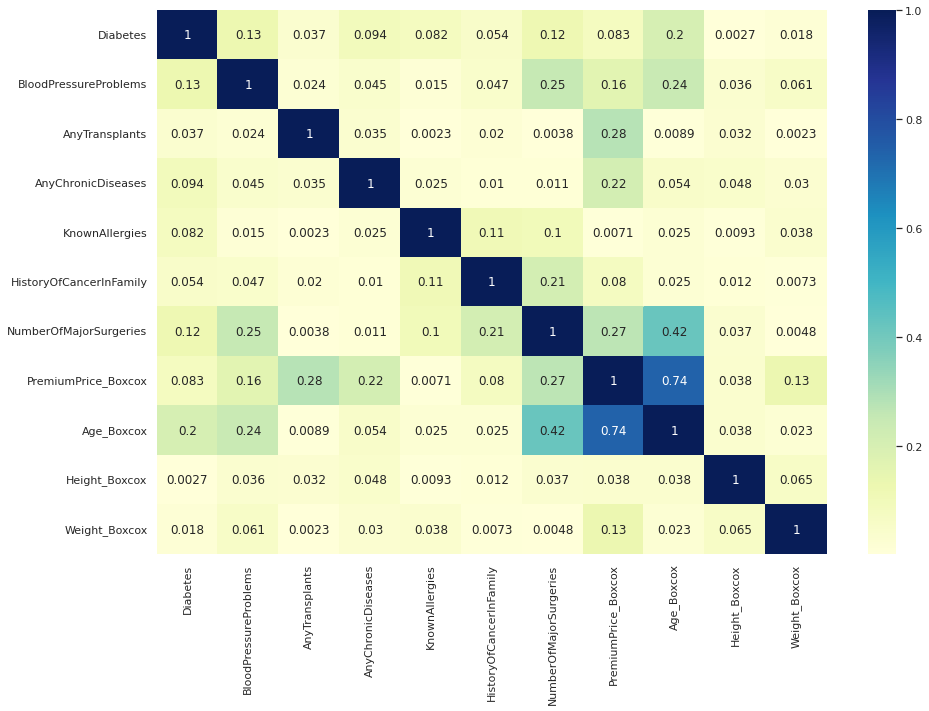

In [75]:
plt.figure(figsize=(15,10))
correlation = FINDF.corr()
sns.heatmap(abs(correlation), annot = True, cmap='YlGnBu')

# **Model Development**

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.



## **Train Test Split**

Splitting Data

X = Independent Variable

y = Dependent Variable

In [87]:
# Splitting our data into Dependent and Independent Variables

X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']

# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [88]:
# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

Shape of the X_train dataset : (784, 10)
Shape of the X_test dataset : (196, 10)
Shape of the y_train dataset : (784,)
Shape of the y_test dataset : (196,)


In [89]:
# Print the shape of the training data
print("Training data shape:", X_train.shape, y_train.shape)

# Print the shape of the test data
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (784, 10) (784,)
Test data shape: (196, 10) (196,)


### **We will build these regression models for our data.**
Linear Regression

Ridge Rigression

Lasso Rigression

Elastic Net Regression

XG Boost Regrression

By using Cross-Validation, we will able to get more metrics and draw important conclusion both about our algorithm and our data.

## **Implementing Linear Regression**

Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.

You’ll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

In [90]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [91]:
#train accuracy of linear regression model
round(regressor.score(X_train,y_train), 2)

0.73

In [92]:
# Test accuracy of linear regression model
round(regressor.score(X_test, y_test), 2)

0.63

In [93]:
#prediction of test data
y_pred = regressor.predict(X_test)
y_pred

array([3.51505094, 3.72340249, 3.63724295, 3.66901611, 3.59552583,
       3.67547136, 3.66725405, 3.66697948, 3.49320998, 3.59647069,
       3.67428694, 3.62976083, 3.49789006, 3.75706507, 3.51299115,
       3.70342457, 3.63026043, 3.4877278 , 3.60235628, 3.51542094,
       3.60171252, 3.46271869, 3.59599256, 3.45980242, 3.53590616,
       3.53263653, 3.63299186, 3.58649107, 3.70340816, 3.49319746,
       3.58984981, 3.71576623, 3.64024696, 3.55950462, 3.61015178,
       3.67510049, 3.61569557, 3.59919744, 3.6716957 , 3.60958439,
       3.56311418, 3.59762558, 3.73805128, 3.6197401 , 3.65892626,
       3.67099079, 3.51359044, 3.54972196, 3.55498209, 3.56770963,
       3.53031654, 3.56611424, 3.72190532, 3.61761136, 3.75981686,
       3.61574188, 3.51429136, 3.56064805, 3.66952902, 3.72742232,
       3.65029458, 3.5766496 , 3.62394318, 3.6342562 , 3.64362887,
       3.48939811, 3.49281629, 3.57953623, 3.76620703, 3.6999628 ,
       3.62538325, 3.47689388, 3.50001098, 3.61262092, 3.61971

In [94]:
np.array(y_test)

array([3.43842903, 3.73299328, 3.67940712, 3.69080572, 3.58703869,
       3.73299328, 3.65542314, 3.65542314, 3.43842903, 3.58703869,
       3.6160259 , 3.65542314, 3.43842903, 3.73299328, 3.55541208,
       3.67940712, 3.69080572, 3.43842903, 3.58703869, 3.55541208,
       3.69080572, 3.43842903, 3.6160259 , 3.43842903, 3.58703869,
       3.58703869, 3.6160259 , 3.65542314, 3.65542314, 3.43842903,
       3.58703869, 3.73299328, 3.66762198, 3.58703869, 3.50181927,
       3.65542314, 3.65542314, 3.58703869, 3.65542314, 3.6160259 ,
       3.58703869, 3.6160259 , 3.6160259 , 3.6160259 , 3.66762198,
       3.73299328, 3.58703869, 3.43842903, 3.58703869, 3.58703869,
       3.43842903, 3.58703869, 3.60183441, 3.69080572, 3.6160259 ,
       3.58703869, 3.74278592, 3.58703869, 3.6160259 , 3.69080572,
       3.65542314, 3.58703869, 3.6160259 , 3.6160259 , 3.73299328,
       3.43842903, 3.43842903, 3.6160259 , 3.65542314, 3.66762198,
       3.65542314, 3.43842903, 3.43842903, 3.6160259 , 3.61602

In [95]:
# creating the DataFrame of test and train Dataset
train_Dataset = pd.DataFrame(X_train,y_train)
test_Dataset = pd.DataFrame(y_test)
test_Dataset.rename(columns= {'PremiumPrice_Boxcox' :'Actual PremiumPrice_Boxcox'}, inplace =True)

In [96]:
test_Dataset['Predicted PremiumPrice_Boxcox']= y_pred
test_Dataset.head()

,Actual PremiumPrice_Boxcox,Predicted PremiumPrice_Boxcox
372,3.438429,3.515051
694,3.732993,3.723402
405,3.679407,3.637243
680,3.690806,3.669016
970,3.587039,3.595526


In [97]:
# Test Performance of Linear Regregression
print("MSE value :", round(mean_squared_error(y_test, y_pred), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred)), 4)) 
print("MAE value :", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("r2 score :", round(r2_score(y_test, y_pred),4))

MSE value : 0.0031
RMSE value : 0.0559
MAE value : 0.0425
MAPE value : 0.0118
r2 score : 0.6258


Text(0, 0.5, 'Predicted test value')

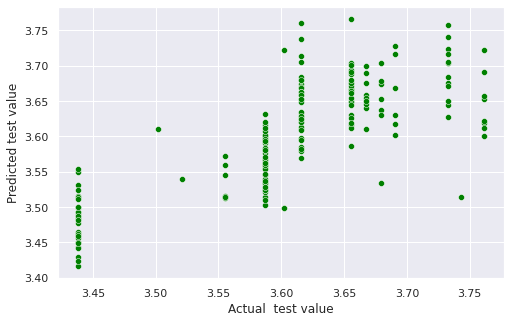

In [98]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(y_test, y_pred,color='green')
plt.xlabel('Actual  test value')
plt.ylabel('Predicted test value')

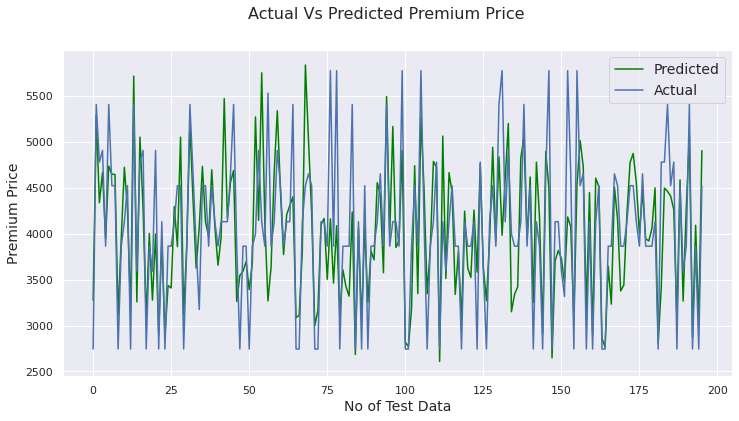

In [99]:
# Actual Price vs predicted price for Linear Regression plot
plt.figure(figsize=(12,6))
plt.plot(10**(y_pred),color='green')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Premium Price', fontsize =16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Premium Price', fontsize= 14)
plt.grid(True)

Ridge and Lasso Regression

Ridge and Lasso Regression are types of Regularization techniques

Regularization techniques are used to deal with overfitting and when the dataset is large

Ridge and Lasso Regression involve adding penalties to the regression function

## **Implementing Ridge Regression**

Ridge Regression: As mentioned before, ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients)

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

α = 0:
The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.
α = ∞:
The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
0 < α < ∞: The magnitude of α will decide the weightage given to different parts of objective. The coefficients will be somewhere between 0 and ones for simple linear regression.
I hope this gives some sense on how α would impact the magnitude of coefficients. One thing is for sure that any non-zero value would give values less than that of simple linear regression. By how much? We’ll find out soon. Leaving the mathematical details for later, lets see ridge regression in action on the same problem as above.



In [100]:
# fit data into ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge (alpha= 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [101]:
# Accuracy of Ridge regression model
round(ridge.score(X_train, y_train), 2)

0.73

In [102]:
# prediction of test data
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([3.51505979, 3.72337499, 3.63723372, 3.66900171, 3.59553039,
       3.67545815, 3.66724923, 3.66698037, 3.49322052, 3.59647286,
       3.67426861, 3.62976277, 3.4979058 , 3.75704235, 3.51299565,
       3.70340438, 3.63025689, 3.48774134, 3.60235179, 3.51543878,
       3.60170842, 3.46273616, 3.59598609, 3.4598186 , 3.53591225,
       3.53264053, 3.63299121, 3.58650226, 3.70340251, 3.49321442,
       3.58985167, 3.71574707, 3.6402326 , 3.55950855, 3.61015742,
       3.67510374, 3.61569902, 3.59919715, 3.67169867, 3.60958022,
       3.56311487, 3.59762136, 3.73802252, 3.61973769, 3.65891291,
       3.67098182, 3.51360401, 3.54973581, 3.55499457, 3.56771281,
       3.53032337, 3.56611341, 3.72189519, 3.61760551, 3.75978897,
       3.61574093, 3.51430027, 3.56064724, 3.66951409, 3.72739674,
       3.65030402, 3.57665458, 3.62393194, 3.63424166, 3.64361365,
       3.48941185, 3.49283424, 3.57953501, 3.76619887, 3.69993884,
       3.62539014, 3.47690899, 3.50002479, 3.61262187, 3.61971

In [103]:
np.array(y_test)

array([3.43842903, 3.73299328, 3.67940712, 3.69080572, 3.58703869,
       3.73299328, 3.65542314, 3.65542314, 3.43842903, 3.58703869,
       3.6160259 , 3.65542314, 3.43842903, 3.73299328, 3.55541208,
       3.67940712, 3.69080572, 3.43842903, 3.58703869, 3.55541208,
       3.69080572, 3.43842903, 3.6160259 , 3.43842903, 3.58703869,
       3.58703869, 3.6160259 , 3.65542314, 3.65542314, 3.43842903,
       3.58703869, 3.73299328, 3.66762198, 3.58703869, 3.50181927,
       3.65542314, 3.65542314, 3.58703869, 3.65542314, 3.6160259 ,
       3.58703869, 3.6160259 , 3.6160259 , 3.6160259 , 3.66762198,
       3.73299328, 3.58703869, 3.43842903, 3.58703869, 3.58703869,
       3.43842903, 3.58703869, 3.60183441, 3.69080572, 3.6160259 ,
       3.58703869, 3.74278592, 3.58703869, 3.6160259 , 3.69080572,
       3.65542314, 3.58703869, 3.6160259 , 3.6160259 , 3.73299328,
       3.43842903, 3.43842903, 3.6160259 , 3.65542314, 3.66762198,
       3.65542314, 3.43842903, 3.43842903, 3.6160259 , 3.61602

In [104]:
# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred_ridge), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred_ridge), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred_ridge), 4))
print("R2 score:", round(r2_score(y_test, y_pred_ridge), 4))

MSE score: 0.0031
RMSE score: 0.0559
MAE score: 0.0425
MAPE score: 0.0118
R2 score: 0.6258


Text(0, 0.5, 'Predicted Value')

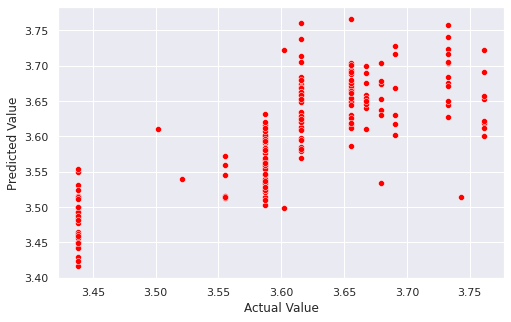

In [105]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(y_test,y_pred_ridge,color='red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

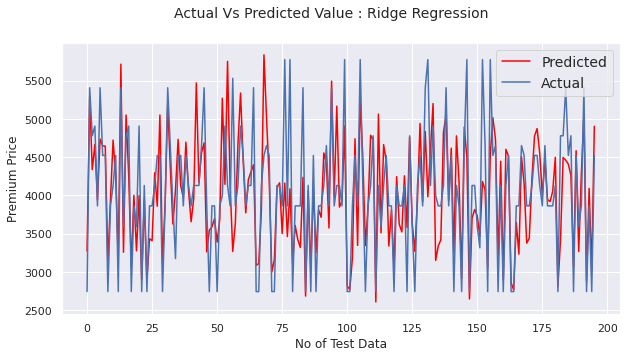

In [106]:
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_ridge),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value : Ridge Regression', fontsize= 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No of Test Data', fontsize = 12)
plt.ylabel('Premium Price', fontsize= 12)
plt.grid(True)

## **Implementing Cross Validation Of Ridge**


Cross-Validation is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

*   To overcome over-fitting problems, we use a technique called Cross-Validation.

*   Let’s dive deep and learn about some of the model evaluation techniques.

In [108]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV


In [109]:
# Hyperparameter of tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [110]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [111]:
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative MSE(mean squared error) score is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 1e-15
 The negative MSE(mean squared error) score is : -0.003


In [112]:
# Model Prediction
y_pred_ridge1 = ridge_regressor.predict(X_test)
y_pred_ridge1

array([3.51505094, 3.72340249, 3.63724295, 3.66901611, 3.59552583,
       3.67547136, 3.66725405, 3.66697948, 3.49320998, 3.59647069,
       3.67428694, 3.62976083, 3.49789006, 3.75706507, 3.51299115,
       3.70342457, 3.63026043, 3.4877278 , 3.60235628, 3.51542094,
       3.60171252, 3.46271869, 3.59599256, 3.45980242, 3.53590616,
       3.53263653, 3.63299186, 3.58649107, 3.70340816, 3.49319746,
       3.58984981, 3.71576623, 3.64024696, 3.55950462, 3.61015178,
       3.67510049, 3.61569557, 3.59919744, 3.6716957 , 3.60958439,
       3.56311418, 3.59762558, 3.73805128, 3.6197401 , 3.65892626,
       3.67099079, 3.51359044, 3.54972196, 3.55498209, 3.56770963,
       3.53031654, 3.56611424, 3.72190532, 3.61761136, 3.75981686,
       3.61574188, 3.51429136, 3.56064805, 3.66952902, 3.72742232,
       3.65029458, 3.5766496 , 3.62394318, 3.6342562 , 3.64362887,
       3.48939811, 3.49281629, 3.57953623, 3.76620703, 3.6999628 ,
       3.62538325, 3.47689388, 3.50001098, 3.61262092, 3.61971

In [113]:
np.array(y_test)

array([3.43842903, 3.73299328, 3.67940712, 3.69080572, 3.58703869,
       3.73299328, 3.65542314, 3.65542314, 3.43842903, 3.58703869,
       3.6160259 , 3.65542314, 3.43842903, 3.73299328, 3.55541208,
       3.67940712, 3.69080572, 3.43842903, 3.58703869, 3.55541208,
       3.69080572, 3.43842903, 3.6160259 , 3.43842903, 3.58703869,
       3.58703869, 3.6160259 , 3.65542314, 3.65542314, 3.43842903,
       3.58703869, 3.73299328, 3.66762198, 3.58703869, 3.50181927,
       3.65542314, 3.65542314, 3.58703869, 3.65542314, 3.6160259 ,
       3.58703869, 3.6160259 , 3.6160259 , 3.6160259 , 3.66762198,
       3.73299328, 3.58703869, 3.43842903, 3.58703869, 3.58703869,
       3.43842903, 3.58703869, 3.60183441, 3.69080572, 3.6160259 ,
       3.58703869, 3.74278592, 3.58703869, 3.6160259 , 3.69080572,
       3.65542314, 3.58703869, 3.6160259 , 3.6160259 , 3.73299328,
       3.43842903, 3.43842903, 3.6160259 , 3.65542314, 3.66762198,
       3.65542314, 3.43842903, 3.43842903, 3.6160259 , 3.61602

In [114]:
# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred_ridge1), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge1)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred_ridge1), 2))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred_ridge1), 4))
print("R2 score:", round(r2_score(y_test, y_pred_ridge1), 4))

MSE score: 0.0031
RMSE score: 0.0559
MAE score: 0.04
MAPE score: 0.0118
R2 score: 0.6258


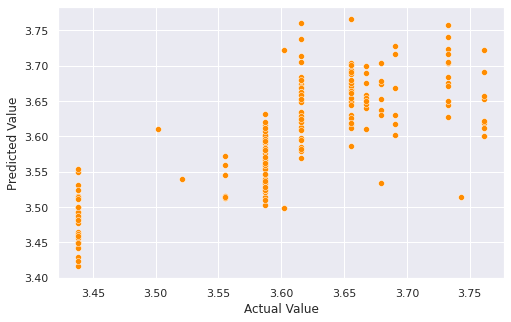

In [115]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test), (y_pred_ridge1),color='darkorange')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

## **Ridge Predication vs Actual (After Cross-Validation)**

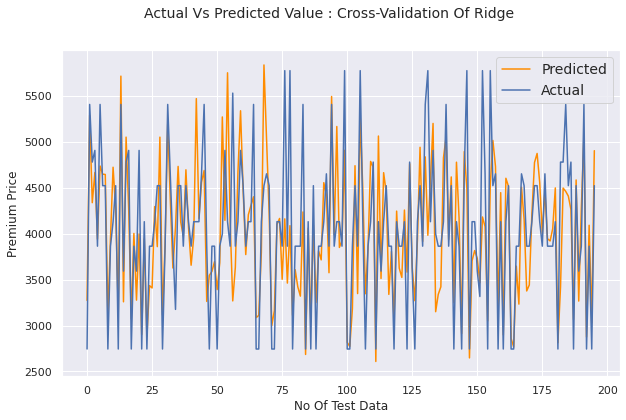

In [116]:
# actual Price Vs Predicted Price for ridge regression
predicted = 10**(y_pred_ridge1)
Actual = 10**(np.array(y_test))
plt.figure(figsize=(10,6))
plt.plot(predicted,color='darkorange')
plt.plot(Actual)
plt.suptitle('Actual Vs Predicted Value : Cross-Validation Of Ridge ', fontsize = 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No Of Test Data', fontsize= 12)
plt.ylabel('Premium Price', fontsize= 12)
plt.grid(True)

## **Implementing Lasso Regression**


LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

Lets consider the former first and worry about the latter later.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients) Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

1. α = 0: Same coefficients as simple linear regression
2. α = ∞: All coefficients zero (same logic as before)
3. 0 < α < ∞: coefficients between 0 and that of simple linear regression
Yes its appearing to be very similar to Ridge till now. But just hang on with me and you’ll know the difference by the time we finish.

In [117]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=0.005, max_iter = 3000)
lasso1.fit(X_train, y_train) 

Lasso(alpha=0.005, max_iter=3000)

In [118]:
# Accuracy of lasso regression model
round(lasso1.score(X_train, y_train), 4)

0.7077

In [119]:
# prediction of train data
y_pred_lasso = lasso1.predict(X_test)

In [120]:
y_pred_lasso

array([3.508052  , 3.70712126, 3.62565363, 3.65257157, 3.60518707,
       3.66418455, 3.66408655, 3.66841163, 3.49719779, 3.60045086,
       3.67305426, 3.63491477, 3.50868202, 3.73845242, 3.52613865,
       3.68440235, 3.61081449, 3.49719779, 3.58895144, 3.53547009,
       3.58481497, 3.4646553 , 3.60153911, 3.46982767, 3.53436539,
       3.54719938, 3.62879766, 3.60426617, 3.70511624, 3.51168206,
       3.58788019, 3.69867551, 3.63759913, 3.5670977 , 3.61645418,
       3.69157556, 3.62608383, 3.60071011, 3.67312818, 3.62065309,
       3.56624237, 3.60022839, 3.71615293, 3.62350547, 3.65021909,
       3.6577006 , 3.53161708, 3.55374538, 3.56495355, 3.58329547,
       3.53051194, 3.57023965, 3.71118809, 3.60914479, 3.72305002,
       3.61680012, 3.52278111, 3.57449479, 3.65193496, 3.69328695,
       3.67197817, 3.57301501, 3.6094142 , 3.64230124, 3.62976639,
       3.49321444, 3.49360156, 3.58887894, 3.75941938, 3.69058522,
       3.63873006, 3.47817597, 3.5109445 , 3.62283049, 3.62874

In [121]:
np.array(y_test)

array([3.43842903, 3.73299328, 3.67940712, 3.69080572, 3.58703869,
       3.73299328, 3.65542314, 3.65542314, 3.43842903, 3.58703869,
       3.6160259 , 3.65542314, 3.43842903, 3.73299328, 3.55541208,
       3.67940712, 3.69080572, 3.43842903, 3.58703869, 3.55541208,
       3.69080572, 3.43842903, 3.6160259 , 3.43842903, 3.58703869,
       3.58703869, 3.6160259 , 3.65542314, 3.65542314, 3.43842903,
       3.58703869, 3.73299328, 3.66762198, 3.58703869, 3.50181927,
       3.65542314, 3.65542314, 3.58703869, 3.65542314, 3.6160259 ,
       3.58703869, 3.6160259 , 3.6160259 , 3.6160259 , 3.66762198,
       3.73299328, 3.58703869, 3.43842903, 3.58703869, 3.58703869,
       3.43842903, 3.58703869, 3.60183441, 3.69080572, 3.6160259 ,
       3.58703869, 3.74278592, 3.58703869, 3.6160259 , 3.69080572,
       3.65542314, 3.58703869, 3.6160259 , 3.6160259 , 3.73299328,
       3.43842903, 3.43842903, 3.6160259 , 3.65542314, 3.66762198,
       3.65542314, 3.43842903, 3.43842903, 3.6160259 , 3.61602

In [122]:
# Test Performance of lasso regression model

print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0032
RMSE : 0.0564
MAE : 0.0423
MAPE : 0.0117
R2 : 0.6179


Text(0, 0.5, 'Predicted Value')

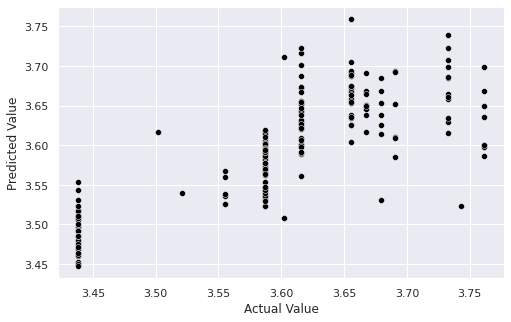

In [123]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(y_test, y_pred_lasso,color='black')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

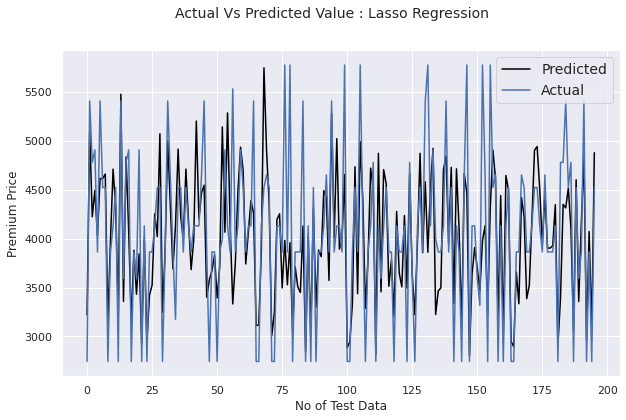

In [124]:
# Actual price vs predicted price for lasso regression ploting
plt.figure(figsize= (10,6))
plt.plot(10**(y_pred_lasso),color='black')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value : Lasso Regression', fontsize = 14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 12)
plt.ylabel('Premium Price', fontsize = 12)
plt.grid(True)

## **Implemeting Cross Validation of Lasso**
Cross-Validation is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

To overcome over-fitting problems, we use a technique called Cross-Validation.
Let’s dive deep and learn about some of the model evaluation techniques.

In [125]:
# Hyper parameter of Tuning For Lasso Regression

lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(X_train, y_train) 


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [126]:
print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.0001
 The negative mean squared error is :  -0.0025


In [127]:
# Prediction of test data .
y_pred_lasso1 = lasso_regressor.predict(X_test)
y_pred_lasso

array([3.508052  , 3.70712126, 3.62565363, 3.65257157, 3.60518707,
       3.66418455, 3.66408655, 3.66841163, 3.49719779, 3.60045086,
       3.67305426, 3.63491477, 3.50868202, 3.73845242, 3.52613865,
       3.68440235, 3.61081449, 3.49719779, 3.58895144, 3.53547009,
       3.58481497, 3.4646553 , 3.60153911, 3.46982767, 3.53436539,
       3.54719938, 3.62879766, 3.60426617, 3.70511624, 3.51168206,
       3.58788019, 3.69867551, 3.63759913, 3.5670977 , 3.61645418,
       3.69157556, 3.62608383, 3.60071011, 3.67312818, 3.62065309,
       3.56624237, 3.60022839, 3.71615293, 3.62350547, 3.65021909,
       3.6577006 , 3.53161708, 3.55374538, 3.56495355, 3.58329547,
       3.53051194, 3.57023965, 3.71118809, 3.60914479, 3.72305002,
       3.61680012, 3.52278111, 3.57449479, 3.65193496, 3.69328695,
       3.67197817, 3.57301501, 3.6094142 , 3.64230124, 3.62976639,
       3.49321444, 3.49360156, 3.58887894, 3.75941938, 3.69058522,
       3.63873006, 3.47817597, 3.5109445 , 3.62283049, 3.62874

In [128]:
np.array(y_test)

array([3.43842903, 3.73299328, 3.67940712, 3.69080572, 3.58703869,
       3.73299328, 3.65542314, 3.65542314, 3.43842903, 3.58703869,
       3.6160259 , 3.65542314, 3.43842903, 3.73299328, 3.55541208,
       3.67940712, 3.69080572, 3.43842903, 3.58703869, 3.55541208,
       3.69080572, 3.43842903, 3.6160259 , 3.43842903, 3.58703869,
       3.58703869, 3.6160259 , 3.65542314, 3.65542314, 3.43842903,
       3.58703869, 3.73299328, 3.66762198, 3.58703869, 3.50181927,
       3.65542314, 3.65542314, 3.58703869, 3.65542314, 3.6160259 ,
       3.58703869, 3.6160259 , 3.6160259 , 3.6160259 , 3.66762198,
       3.73299328, 3.58703869, 3.43842903, 3.58703869, 3.58703869,
       3.43842903, 3.58703869, 3.60183441, 3.69080572, 3.6160259 ,
       3.58703869, 3.74278592, 3.58703869, 3.6160259 , 3.69080572,
       3.65542314, 3.58703869, 3.6160259 , 3.6160259 , 3.73299328,
       3.43842903, 3.43842903, 3.6160259 , 3.65542314, 3.66762198,
       3.65542314, 3.43842903, 3.43842903, 3.6160259 , 3.61602

In [129]:
# Test performance

print("MSE :", round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))
print("MAE :", round(mean_absolute_error(y_test, y_pred_lasso), 4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso), 4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0032
RMSE : 0.0564
MAE : 0.0423
MAPE : 0.0117
R2 : 0.6179


Text(0, 0.5, 'Predicted Value')

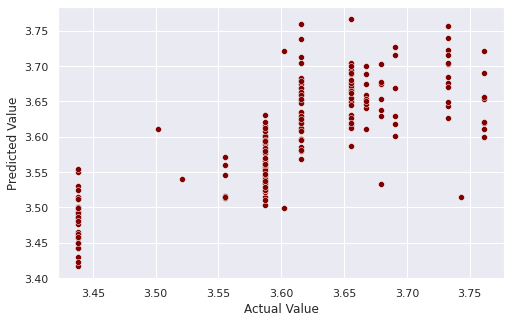

In [159]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_lasso1),color='maroon')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

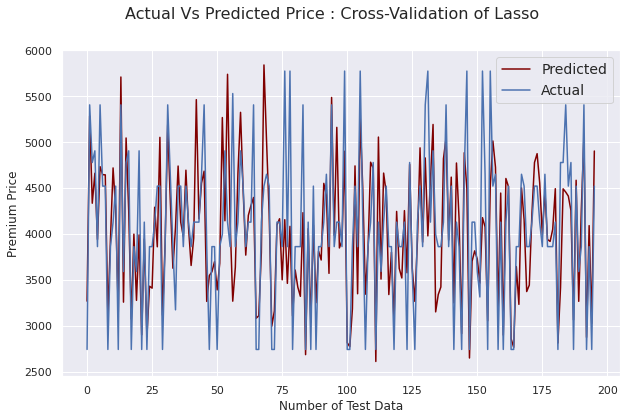

In [160]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_lasso1),color='maroon')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price : Cross-Validation of Lasso', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Premium Price', fontsize =12)
plt.grid(True)

## **Implementing Elastic Net Regression**

Elastic Net is a regression method that performs variable selection and regularization both simultaneously. The term regularization is the main concept behind the elastic net. Regularization comes into picture when the model is overfitted. Now we need to understand what overfitting means, so overfitting is a problem that occurs when the model is performing good with the training dataset, but with the test, dataset model is giving errors; in this situation the regularization is a technique to reduce the errors by fitting a function appropriately in the training dataset. These functions can be called penalties.

In [132]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [133]:
elastic_reg.score(X_train,y_train)

0.32111972694011093

In [134]:
y_elastic_pred = elastic_reg.predict(X_test)

In [135]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_elastic_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_elastic_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_elastic_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_elastic_pred),4))
print("R2 :",round(r2_score(y_test, y_elastic_pred), 4))

MSE : 0.0059
RMSE : 0.077
MAE : 0.0558
MAPE : 0.0156
R2 : 0.2891


Text(0, 0.5, 'Predicted Value')

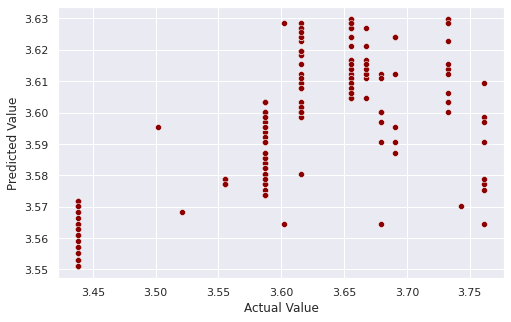

In [136]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_elastic_pred),color= 'darkred')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

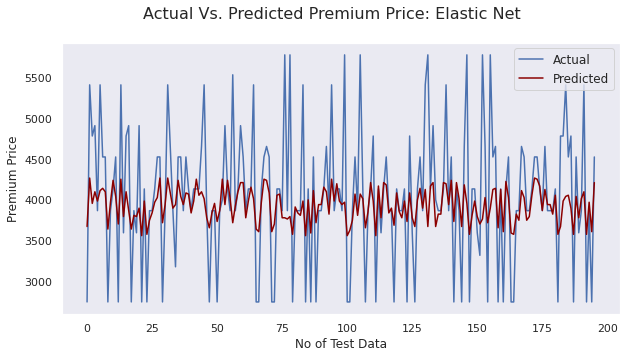

In [138]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred),color='darkred')
plt.suptitle('Actual Vs. Predicted Premium Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Premium Price', fontsize=12)
plt.grid()

## **Implementing Cross Validation of Elastic Net**

Cross-Validation is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

To overcome over-fitting problems, we use a technique called Cross-Validation.
Let’s dive deep and learn about some of the model evaluation techniques.

In [139]:
# Hyper-Parameter Tuning for Elastic Net

elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)

In [140]:
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [141]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.0001 0.8
The negative mean squared error for is:  -0.003


In [142]:
y_pred_elastic1 = elastic_model.predict(X_test)
y_pred_elastic1

array([3.51470182, 3.72313401, 3.63715053, 3.66873704, 3.59567401,
       3.67531398, 3.6672294 , 3.66701879, 3.49324178, 3.59644764,
       3.67406667, 3.63004144, 3.49824445, 3.7567649 , 3.51311125,
       3.70309836, 3.62987324, 3.48785377, 3.60211449, 3.51565522,
       3.6012286 , 3.46288011, 3.59617021, 3.45999967, 3.53570857,
       3.53292509, 3.63279875, 3.5867562 , 3.70357233, 3.4936075 ,
       3.58958134, 3.7154088 , 3.64009809, 3.55973023, 3.61033657,
       3.67574019, 3.61601773, 3.59936464, 3.67173347, 3.6099333 ,
       3.56329646, 3.59742114, 3.73764143, 3.61970609, 3.65868114,
       3.67081987, 3.51411288, 3.54997106, 3.55513575, 3.56813946,
       3.53048195, 3.5661491 , 3.72178644, 3.61757325, 3.75910138,
       3.61568954, 3.5144918 , 3.56105058, 3.66908015, 3.7266022 ,
       3.65077514, 3.57655177, 3.6237609 , 3.6344696 , 3.64341937,
       3.48919486, 3.49281869, 3.57962752, 3.76648284, 3.69988144,
       3.62563689, 3.47677867, 3.50005869, 3.61274786, 3.61984

In [143]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic1), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic1)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic1),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic1),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic1), 4))

MSE : 0.0031
RMSE : 0.0558
MAE : 0.0424
MAPE : 0.0118
R2 : 0.6261


Text(0, 0.5, 'Predicted Value')

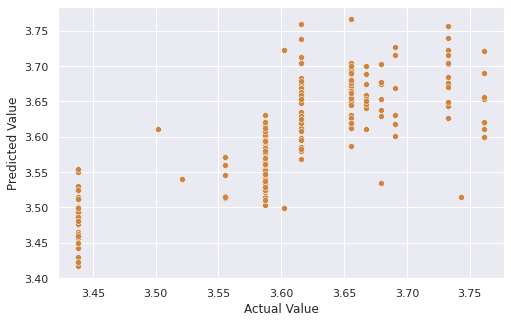

In [144]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_elastic1),color='peru')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

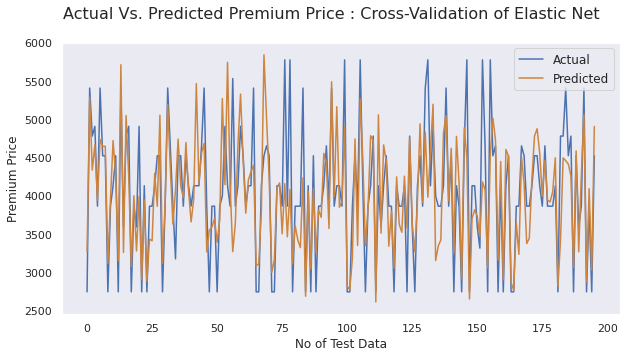

In [145]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic1),color='peru')
plt.suptitle('Actual Vs. Predicted Premium Price : Cross-Validation of Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Premium Price', fontsize=12)
plt.grid()

## **Implementing XG Boost Regression**


XGBoost is a powerful approach for building supervised regression models.The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

 XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [146]:
# fitting the data into XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[12:57:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [147]:
xgb.score(X_train,y_train)

0.9235209973118729

In [148]:
y_pred_XG = xgb.predict(X_test)
y_pred_XG

array([3.4659758, 3.7072058, 3.6577303, 3.678824 , 3.6026447, 3.7158215,
       3.6592002, 3.6523619, 3.4545753, 3.6026447, 3.6272638, 3.663952 ,
       3.4456253, 3.7167385, 3.5701687, 3.6765785, 3.6337655, 3.4545753,
       3.6084094, 3.576536 , 3.645703 , 3.4468722, 3.60073  , 3.439292 ,
       3.5800233, 3.5746877, 3.644038 , 3.6401503, 3.6655693, 3.4450486,
       3.605234 , 3.681158 , 3.6524723, 3.5961006, 3.6342766, 3.654611 ,
       3.6519005, 3.6388881, 3.663768 , 3.6253295, 3.5979443, 3.6004376,
       3.6510298, 3.6355627, 3.662723 , 3.7122765, 3.5768778, 3.4428506,
       3.5890856, 3.595835 , 3.4565594, 3.5848846, 3.65979  , 3.6439805,
       3.657379 , 3.6277828, 3.4502656, 3.5942802, 3.6615946, 3.687999 ,
       3.6394222, 3.604255 , 3.6334891, 3.5336063, 3.6861906, 3.450355 ,
       3.464554 , 3.5937433, 3.6952872, 3.6567636, 3.655341 , 3.4452655,
       3.4510698, 3.632248 , 3.6355627, 3.5805163, 3.6923463, 3.5960135,
       3.6868436, 3.6025229, 3.5955834, 3.575225 , 

In [149]:
np.array(y_test)

array([3.43842903, 3.73299328, 3.67940712, 3.69080572, 3.58703869,
       3.73299328, 3.65542314, 3.65542314, 3.43842903, 3.58703869,
       3.6160259 , 3.65542314, 3.43842903, 3.73299328, 3.55541208,
       3.67940712, 3.69080572, 3.43842903, 3.58703869, 3.55541208,
       3.69080572, 3.43842903, 3.6160259 , 3.43842903, 3.58703869,
       3.58703869, 3.6160259 , 3.65542314, 3.65542314, 3.43842903,
       3.58703869, 3.73299328, 3.66762198, 3.58703869, 3.50181927,
       3.65542314, 3.65542314, 3.58703869, 3.65542314, 3.6160259 ,
       3.58703869, 3.6160259 , 3.6160259 , 3.6160259 , 3.66762198,
       3.73299328, 3.58703869, 3.43842903, 3.58703869, 3.58703869,
       3.43842903, 3.58703869, 3.60183441, 3.69080572, 3.6160259 ,
       3.58703869, 3.74278592, 3.58703869, 3.6160259 , 3.69080572,
       3.65542314, 3.58703869, 3.6160259 , 3.6160259 , 3.73299328,
       3.43842903, 3.43842903, 3.6160259 , 3.65542314, 3.66762198,
       3.65542314, 3.43842903, 3.43842903, 3.6160259 , 3.61602

In [151]:
# Test Performance of XGBoost model after validation

print("MSE :",round(mean_squared_error(y_test, y_pred_XG), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_XG)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_XG),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_XG),4))
print("R2 :",round(r2_score(y_test, y_pred_XG), 4))

MSE : 0.0019
RMSE : 0.044
MAE : 0.0251
MAPE : 0.0069
R2 : 0.7681


Text(0, 0.5, 'Predicted Value')

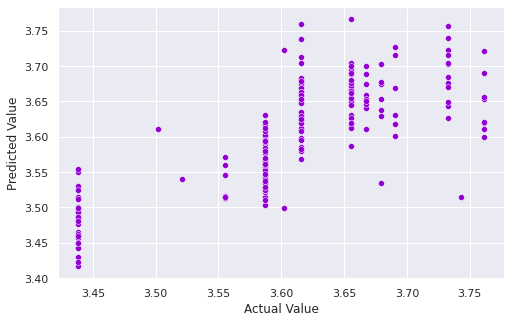

In [162]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_elastic1),color='darkviolet')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

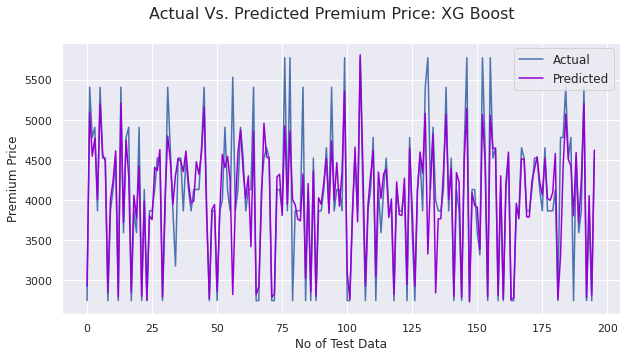

In [163]:
# Actual Price vs. Predicted Price for XGboost after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_XG),color='darkviolet')
plt.suptitle('Actual Vs. Predicted Premium Price: XG Boost', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Premium Price', fontsize=12)
plt.grid(True)

## **Final View Point**

In [164]:
# Function to run all model 
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)
        
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)
    
    return df


In [165]:
models=[regressor,ridge,lasso1,elastic_reg,xgb]

In [166]:
#Testing performance
report=score_model(X_train,y_train,X_test,y_test)
report

[13:08:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model_Name,MAE,MSE,RMSE,MAPE,Rsquare
4,XGBRegressor,0.025,0.002,0.044,0.694,0.768
0,LinearRegression,0.042,0.003,0.056,1.178,0.626
1,Ridge,0.042,0.003,0.056,1.178,0.626
2,Lasso,0.042,0.003,0.056,1.174,0.618
3,ElasticNet,0.056,0.006,0.077,1.557,0.289


# **Conclusion**
